In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics|
from scipy.stats import chi2_contingency

In [2]:
mobileData = pd.read_csv('mobile_data_new.csv')
mobileData.head()

Unnamed: 0 mobile_brand model_name mobile_color  dual_sim  disp_size  \
0           0       Realme  Narzo 10A     So White  Dual Sim      16.56   
1           1       Realme  Narzo 10A      So Blue  Dual Sim      16.56   
2           2       Realme  Narzo 10A      So Blue  Dual Sim      16.56   
3           3       Realme  Narzo 10A     So White  Dual Sim      16.56   
4           4       Realme   Narzo 10   That Green  Dual Sim      16.51   

           os  num_cores  mp_speed  int_memory  ...  mob_weight  \
0  Android 10  Octa Core       2.0          32  ...       195.0   
1  Android 10  Octa Core       2.0          32  ...       195.0   
2  Android 10  Octa Core       2.0          64  ...       195.0   
3  Android 10  Octa Core       2.0          64  ...       195.0   
4  Android 10  Octa Core       2.0         128  ...       199.0   

  resolution_width resolution_height  f_cam_1  f_cam_2  p_cam_1  p_cam_2  \
0             1600               720        5      NaN       12      2.0   
1             1600               720        5      NaN       12      2.0   
2             1600               720        5      NaN       12      2.0   
3             1600               720        5      NaN       12      2.0   
4             1600               720       16      NaN       48      8.0   

   p_cam_3  p_cam_4  mobile_price  
0      2.0      NaN           160  
1      2.0      NaN           160  
2      2.0      NaN           178  
3      2.0      NaN           178  
4      2.0      2.0           214  

[5 rows x 27 columns]

In [3]:
mobileData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         459 non-null    int64  
 1   mobile_brand       459 non-null    object 
 2   model_name         459 non-null    object 
 3   mobile_color       459 non-null    object 
 4   dual_sim           459 non-null    object 
 5   disp_size          459 non-null    float64
 6   os                 459 non-null    object 
 7   num_cores          459 non-null    object 
 8   mp_speed           459 non-null    float64
 9   int_memory         459 non-null    int64  
 10  ram                459 non-null    int64  
 11  network_top        459 non-null    object 
 12  bluetooth          459 non-null    object 
 13  battery_power      459 non-null    int64  
 14  mob_width          459 non-null    float64
 15  mob_height         459 non-null    float64
 16  mob_depth          459 non

In [4]:
#Find number of null/missing data in each Columns
mobileData.isnull().sum()

Unnamed: 0             0
mobile_brand           0
model_name             0
mobile_color           0
dual_sim               0
disp_size              0
os                     0
num_cores              0
mp_speed               0
int_memory             0
ram                    0
network_top            0
bluetooth              0
battery_power          0
mob_width              0
mob_height             0
mob_depth              0
mob_weight             0
resolution_width       0
resolution_height      0
f_cam_1                0
f_cam_2              418
p_cam_1                0
p_cam_2               76
p_cam_3              258
p_cam_4              337
mobile_price           0
dtype: int64

Ans: f_cam_2 , p_cam_2 , p_cam_3 , p_cam_4 have missing values as the empty value probably means the model of smartphone do not have camera, hence ZERO

In [5]:
#Fill missing values with ZERO
nullList = ['f_cam_2', 'p_cam_2' , 'p_cam_3' , 'p_cam_4']
for var in nullList:
    mobileData[var].fillna(value=0,inplace=True)


In [6]:
mobileData.isnull().sum()

Unnamed: 0           0
mobile_brand         0
model_name           0
mobile_color         0
dual_sim             0
disp_size            0
os                   0
num_cores            0
mp_speed             0
int_memory           0
ram                  0
network_top          0
bluetooth            0
battery_power        0
mob_width            0
mob_height           0
mob_depth            0
mob_weight           0
resolution_width     0
resolution_height    0
f_cam_1              0
f_cam_2              0
p_cam_1              0
p_cam_2              0
p_cam_3              0
p_cam_4              0
mobile_price         0
dtype: int64

In [7]:
mobileDataList = ['mobile_brand' , 'model_name', 'mobile_color', 'dual_sim' , 'disp_size', 'os', 'num_cores', 'mp_speed', 'int_memory', 'ram', 'network_top','bluetooth','battery_power', 'mob_width','mob_height','mob_depth', 'mob_weight', 'resolution_width','resolution_height','f_cam_1','f_cam_2', 'p_cam_1','p_cam_2','p_cam_3','p_cam_4','mobile_price']         
size = len(mobileDataList)
print("Number of values in each Column")
for x in range(0,size):
        print( str(mobileDataList[x]) + ": " + str(len(pd.value_counts(mobileData[mobileDataList[x]]))))

Number of values in each Column
mobile_brand: 9
model_name: 125
mobile_color: 165
dual_sim: 2
disp_size: 36
os: 18
num_cores: 3
mp_speed: 18
int_memory: 7
ram: 7
network_top: 5
bluetooth: 1
battery_power: 34
mob_width: 70
mob_height: 81
mob_depth: 55
mob_weight: 62
resolution_width: 16
resolution_height: 14
f_cam_1: 10
f_cam_2: 3
p_cam_1: 10
p_cam_2: 7
p_cam_3: 5
p_cam_4: 3
mobile_price: 97


model_brand, model_name and model_color are most probably categorical variable .
For model_brand, it is evident that multiple index of sample datas fall under the same brand, just different models name or specs.
For model_name instead of ID it has multiple models with the same nme while having different specs, hence they are categorical/class variable
For model.color, there are repetition of the same colour over different models from different brands, hence it is a categorical variable.

disp_size,mp_speed,int_memory, ram, battery_power , mob_width , mob_height , mob_depth , mob_weight, resolution_width,resolution_height,mobile_price.
For these variebles, although they are numeric but at the same time it look as if like categorical varieble as there are standardized specification for compatibilities. It has more widespread of unique values and for those who are not familier with the concept of SmartPhone development, it should be taken as Numeric Data.

dual_sim,os, num_cores, network_top,bluetooth,f_cam_1,f_cam_2, p_cam_1,p_cam_2,p_cam_3,p_cam_4
These Variebles have more specific specification and narower range of unique values, like dual_sim, there is only Yes or No, operation systems are also limited, while number of camera is strongly standardized, hence it is a categorical variable




In [8]:
mobileNumData = ['disp_size','mp_speed', 'int_memory', 'ram','battery_power', 'mob_width','mob_height','mob_depth', 'mob_weight', 'resolution_width','resolution_height','mobile_price']
mobileCatData = ['mobile_brand' , 'model_name', 'mobile_color','dual_sim','os', 'num_cores', 'network_top','bluetooth','f_cam_1','f_cam_2', 'p_cam_1','p_cam_2','p_cam_3','p_cam_4']

print("Number of Numerical Variable =" ,len(mobileNumData))
print("\n")
print("Number of Categorical Varieble =",len(mobileCatData))


Number of Numerical Variable = 12


Number of Categorical Varieble = 14


In [9]:
mobileNumDataFrame = mobileData[mobileNumData]
mobileNumDataFrame.head()
mobileNumDataFrame.describe()

disp_size    mp_speed  int_memory         ram  battery_power  \
count  459.000000  459.000000  459.000000  459.000000     459.000000   
mean    15.907647    2.118296   87.093682    4.877996    4161.383442   
std      0.815102    0.350997   64.919281    2.082977     615.902516   
min     11.940000    1.300000    8.000000    1.000000    2000.000000   
25%     15.700000    2.000000   32.000000    4.000000    4000.000000   
50%     16.000000    2.000000   64.000000    4.000000    4030.000000   
75%     16.510000    2.300000  128.000000    6.000000    4500.000000   
max     17.020000    2.960000  512.000000   12.000000    6000.000000   

        mob_width  mob_height   mob_depth  mob_weight  resolution_width  \
count  459.000000  459.000000  459.000000  459.000000        459.000000   
mean    74.228170  157.731874   10.739216  180.298911       1770.100218   
std     13.106075   12.219824   12.828217   17.884699        566.663242   
min      8.350000    7.380000    7.300000  130.000000        540.000000   
25%     75.000000  155.900000    8.100000  168.000000       1440.000000   
50%     75.350000  158.700000    8.500000  183.000000       1600.000000   
75%     75.800000  162.000000    8.870000  191.000000       2340.000000   
max    159.000000  175.000000   92.000000  215.000000       2400.000000   

       resolution_height  mobile_price  
count         459.000000    459.000000  
mean         1102.431373    296.239651  
std           440.511787    154.892325  
min           540.000000    107.000000  
25%           720.000000    196.000000  
50%          1080.000000    258.000000  
75%          1080.000000    338.000000  
max          2400.000000   1086.000000

In terms of Values:

Lowest STD: disp_size, mp_speed.

Low STD: ram,mob_height,mob_depth,mob_weight, mob_width

High STD: int_memory, battery_power, resolution_width, resolution_height, mobile_price

In [10]:
f, axes = plt.subplots(12, 3, figsize=(100, 300))
count = 0
for var in mobileNumData:
    sb.boxplot(data = mobileData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = mobileData[var], ax = axes[count,1])
    sb.violinplot(data = mobileData[var], orient = "h", ax = axes[count,2])
    count += 1

Ratio Wise: 

disp_size, mp_speed, int_memory, ram,battery_power, resolution_height, mobile_price) have almost similar compactness and central tendency with less spread of data compare to (mob_width, mob_weight) which has wider spread of data

As for (mob_width, mob_height, mob_depth) has higher central tendency and lower spread of data, hence it is more compact


In [11]:
def numOutliers(DF):
    # finding the 1st quartile
    q1 = np.quantile(DF, 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(DF, 0.75)
    med = np.median(DF)
    # finding the iqr region
    iqr = q3-q1
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers = DF[(DF <= lower_bound) | (DF >= upper_bound)]
    print("The number of OutLiers = " + str(outliers.size))
    
    
for var in mobileNumDataFrame:
    print("For " +str(var) +",")
    numOutliers(mobileNumDataFrame[var])
    

For disp_size,
The number of OutLiers = 42
For mp_speed,
The number of OutLiers = 78
For int_memory,
The number of OutLiers = 2
For ram,
The number of OutLiers = 13
For battery_power,
The number of OutLiers = 48
For mob_width,
The number of OutLiers = 89
For mob_height,
The number of OutLiers = 19
For mob_depth,
The number of OutLiers = 14
For mob_weight,
The number of OutLiers = 1
For resolution_width,
The number of OutLiers = 0
For resolution_height,
The number of OutLiers = 40
For mobile_price,
The number of OutLiers = 29


mob_width has the largest number of outliers while resolution_width has 0 outliers which is good.
this means that the resolution_width has cleaner data.

<AxesSubplot:>

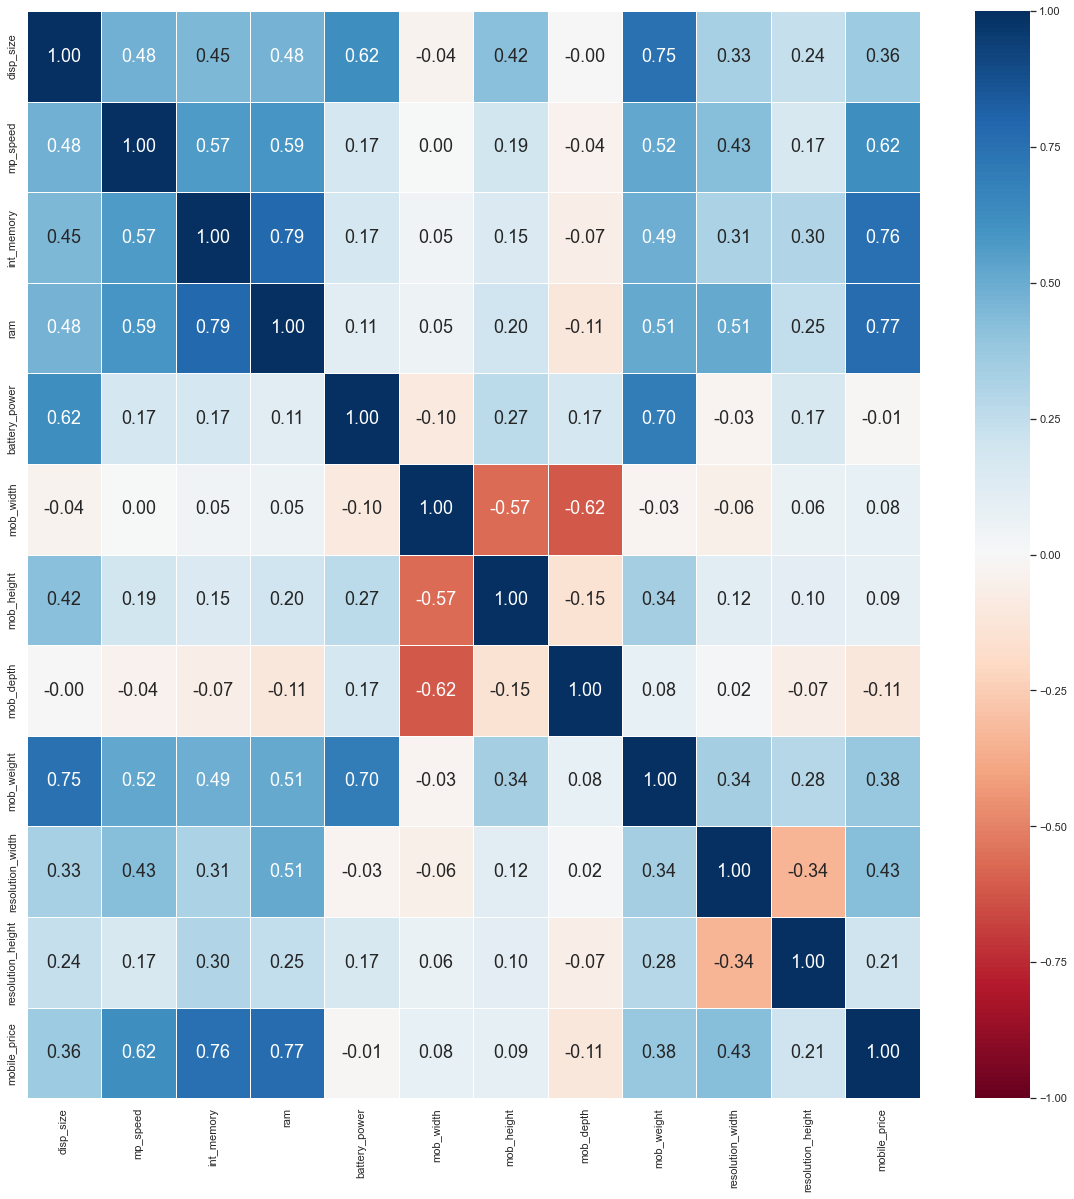

In [12]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(mobileNumDataFrame.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

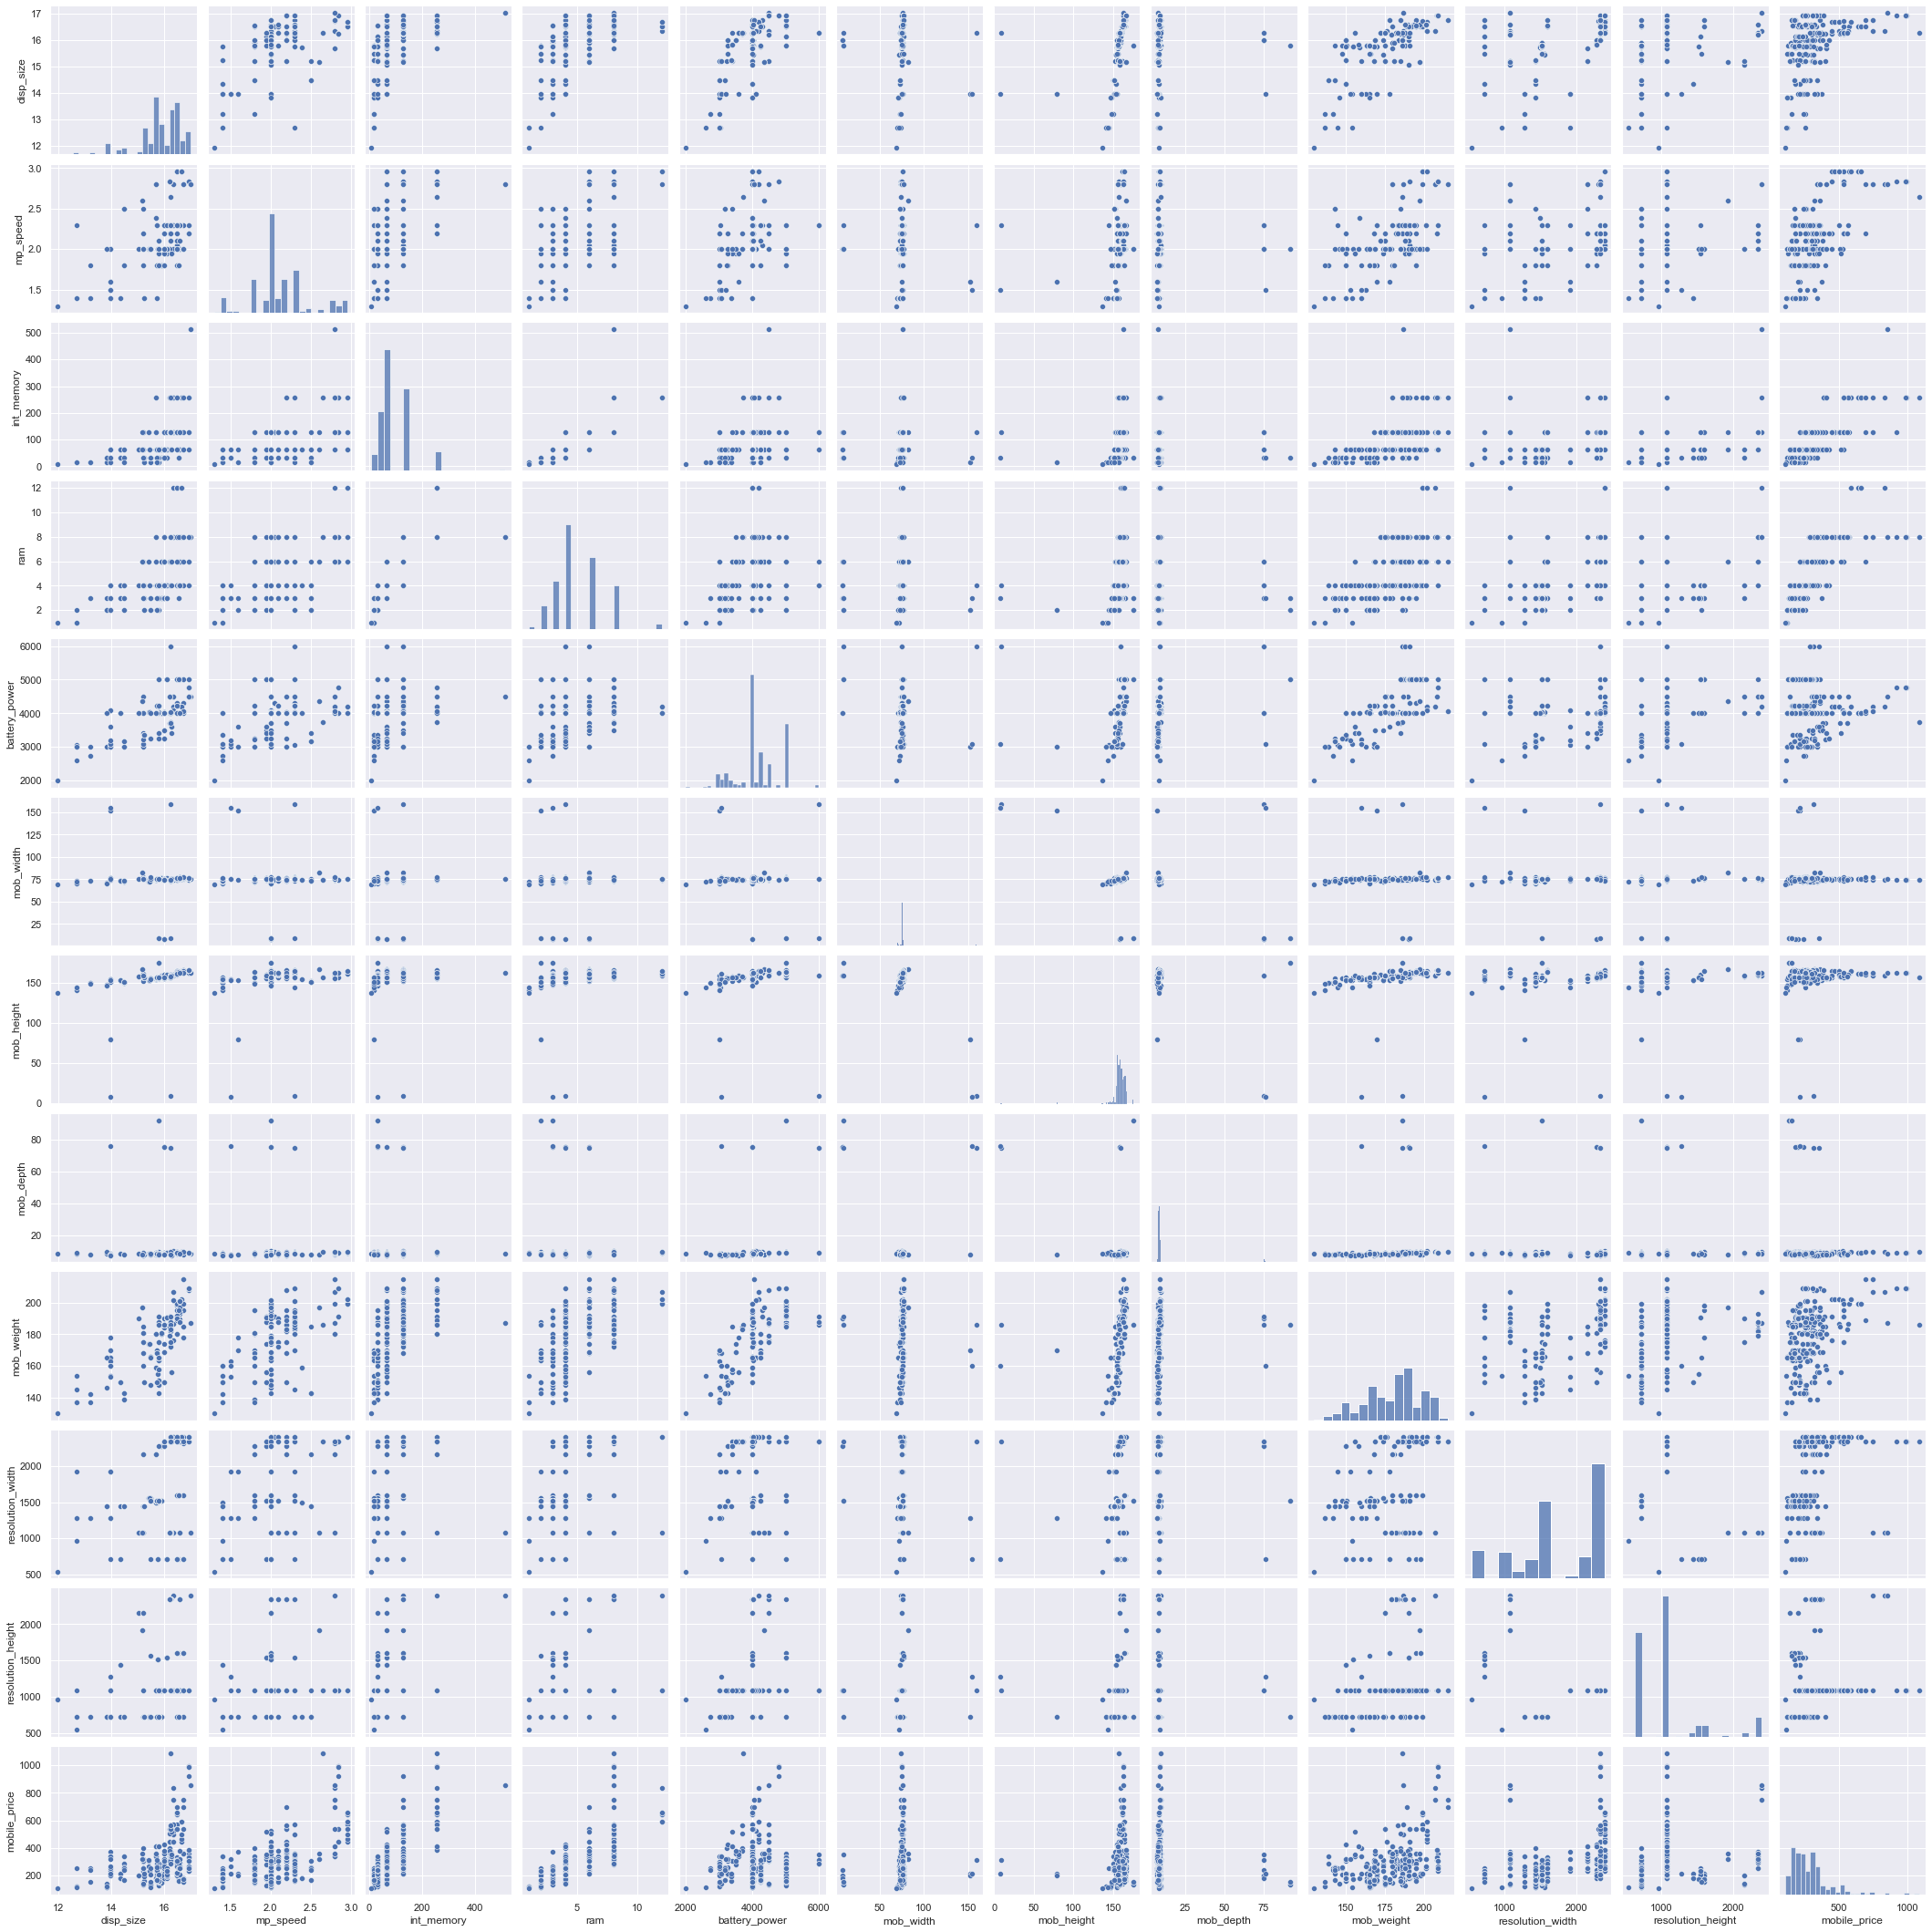

In [13]:
sb.pairplot(data = mobileNumDataFrame)

High correlation with mobile_price:
mp_speed &mobile_price: 0.62
int_memory & mobile_price: 0.76
ram & mobile_price:0.77
This is probably due to higher performance of smartPhone with better spec of memory, mp_speed and ram. Hence it also comes at a greater cost for production. Therefore the better the important features, the more expensive the phone is

disp_size & battery_power: 0.62
This is due to larger display size, the more power it needs to function at the same time, hecne the larget the display size, the larger the battery capacity.

int_memory & ram: 0.79
In production wise, it is preferred to build a phone with faster or compatible speed of processing speed, hence the larger the internal memory, the larger its ram so that it can function faster with both of these factors working together.

disp_size &mob_weight : 0.75
battery_power & mob_weight : 0.70
The larger the display size, the more complicated and efficient processor is needed, hence it should be more coponents and comp;licated hardware embedded in the mobile phones, hence it is heavier. The larger the battery capacity, the heavier it is too, hence the heavier the mobile phone weight.

mp_speed & int_memory: 0.57
mp_speed & ram: 0.59
The larger the memory and ram, the more task it can be efficiently done, hence its speed is faster

mob_width & mob_height: -0.57
mob_width & mob_depth : -0.62
In order to design for the convenience of the user, it is usually wiser to balance the dimention of the phone for easy carry and handling. Therefore, width, height, debth normally have negative correlation with each other for eassy carry.

In [14]:
#For Categorical Data
mobileCatDataFrame = mobileData[mobileCatData]
mobileCatDataFrame.head()
mobileCatDataFrame.describe()

f_cam_1     f_cam_2      p_cam_1     p_cam_2     p_cam_3     p_cam_4
count  459.000000  459.000000   459.000000  459.000000  459.000000  459.000000
mean    16.625272    0.427015    50.590414    5.276688    1.886710    0.538126
std      8.578376    1.632306   316.039440    4.278988    2.819191    0.906169
min      2.000000    0.000000     5.000000    0.000000    0.000000    0.000000
25%      8.000000    0.000000    13.000000    2.000000    0.000000    0.000000
50%     16.000000    0.000000    16.000000    5.000000    0.000000    0.000000
75%     20.000000    0.000000    48.000000    8.000000    2.000000    2.000000
max     44.000000    8.000000  4812.000000   20.000000   13.000000    5.000000

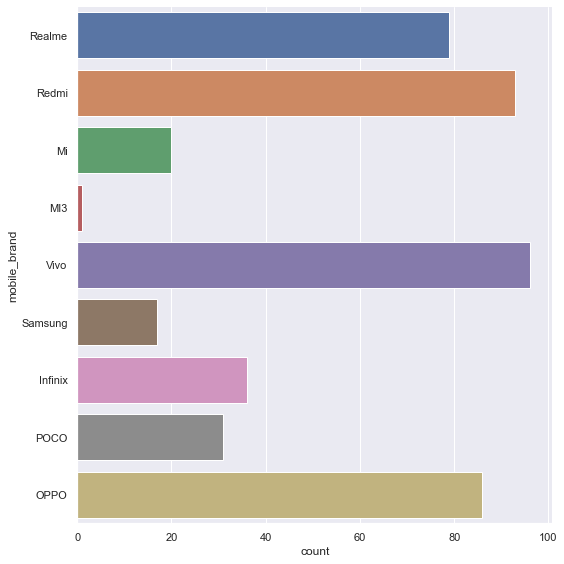

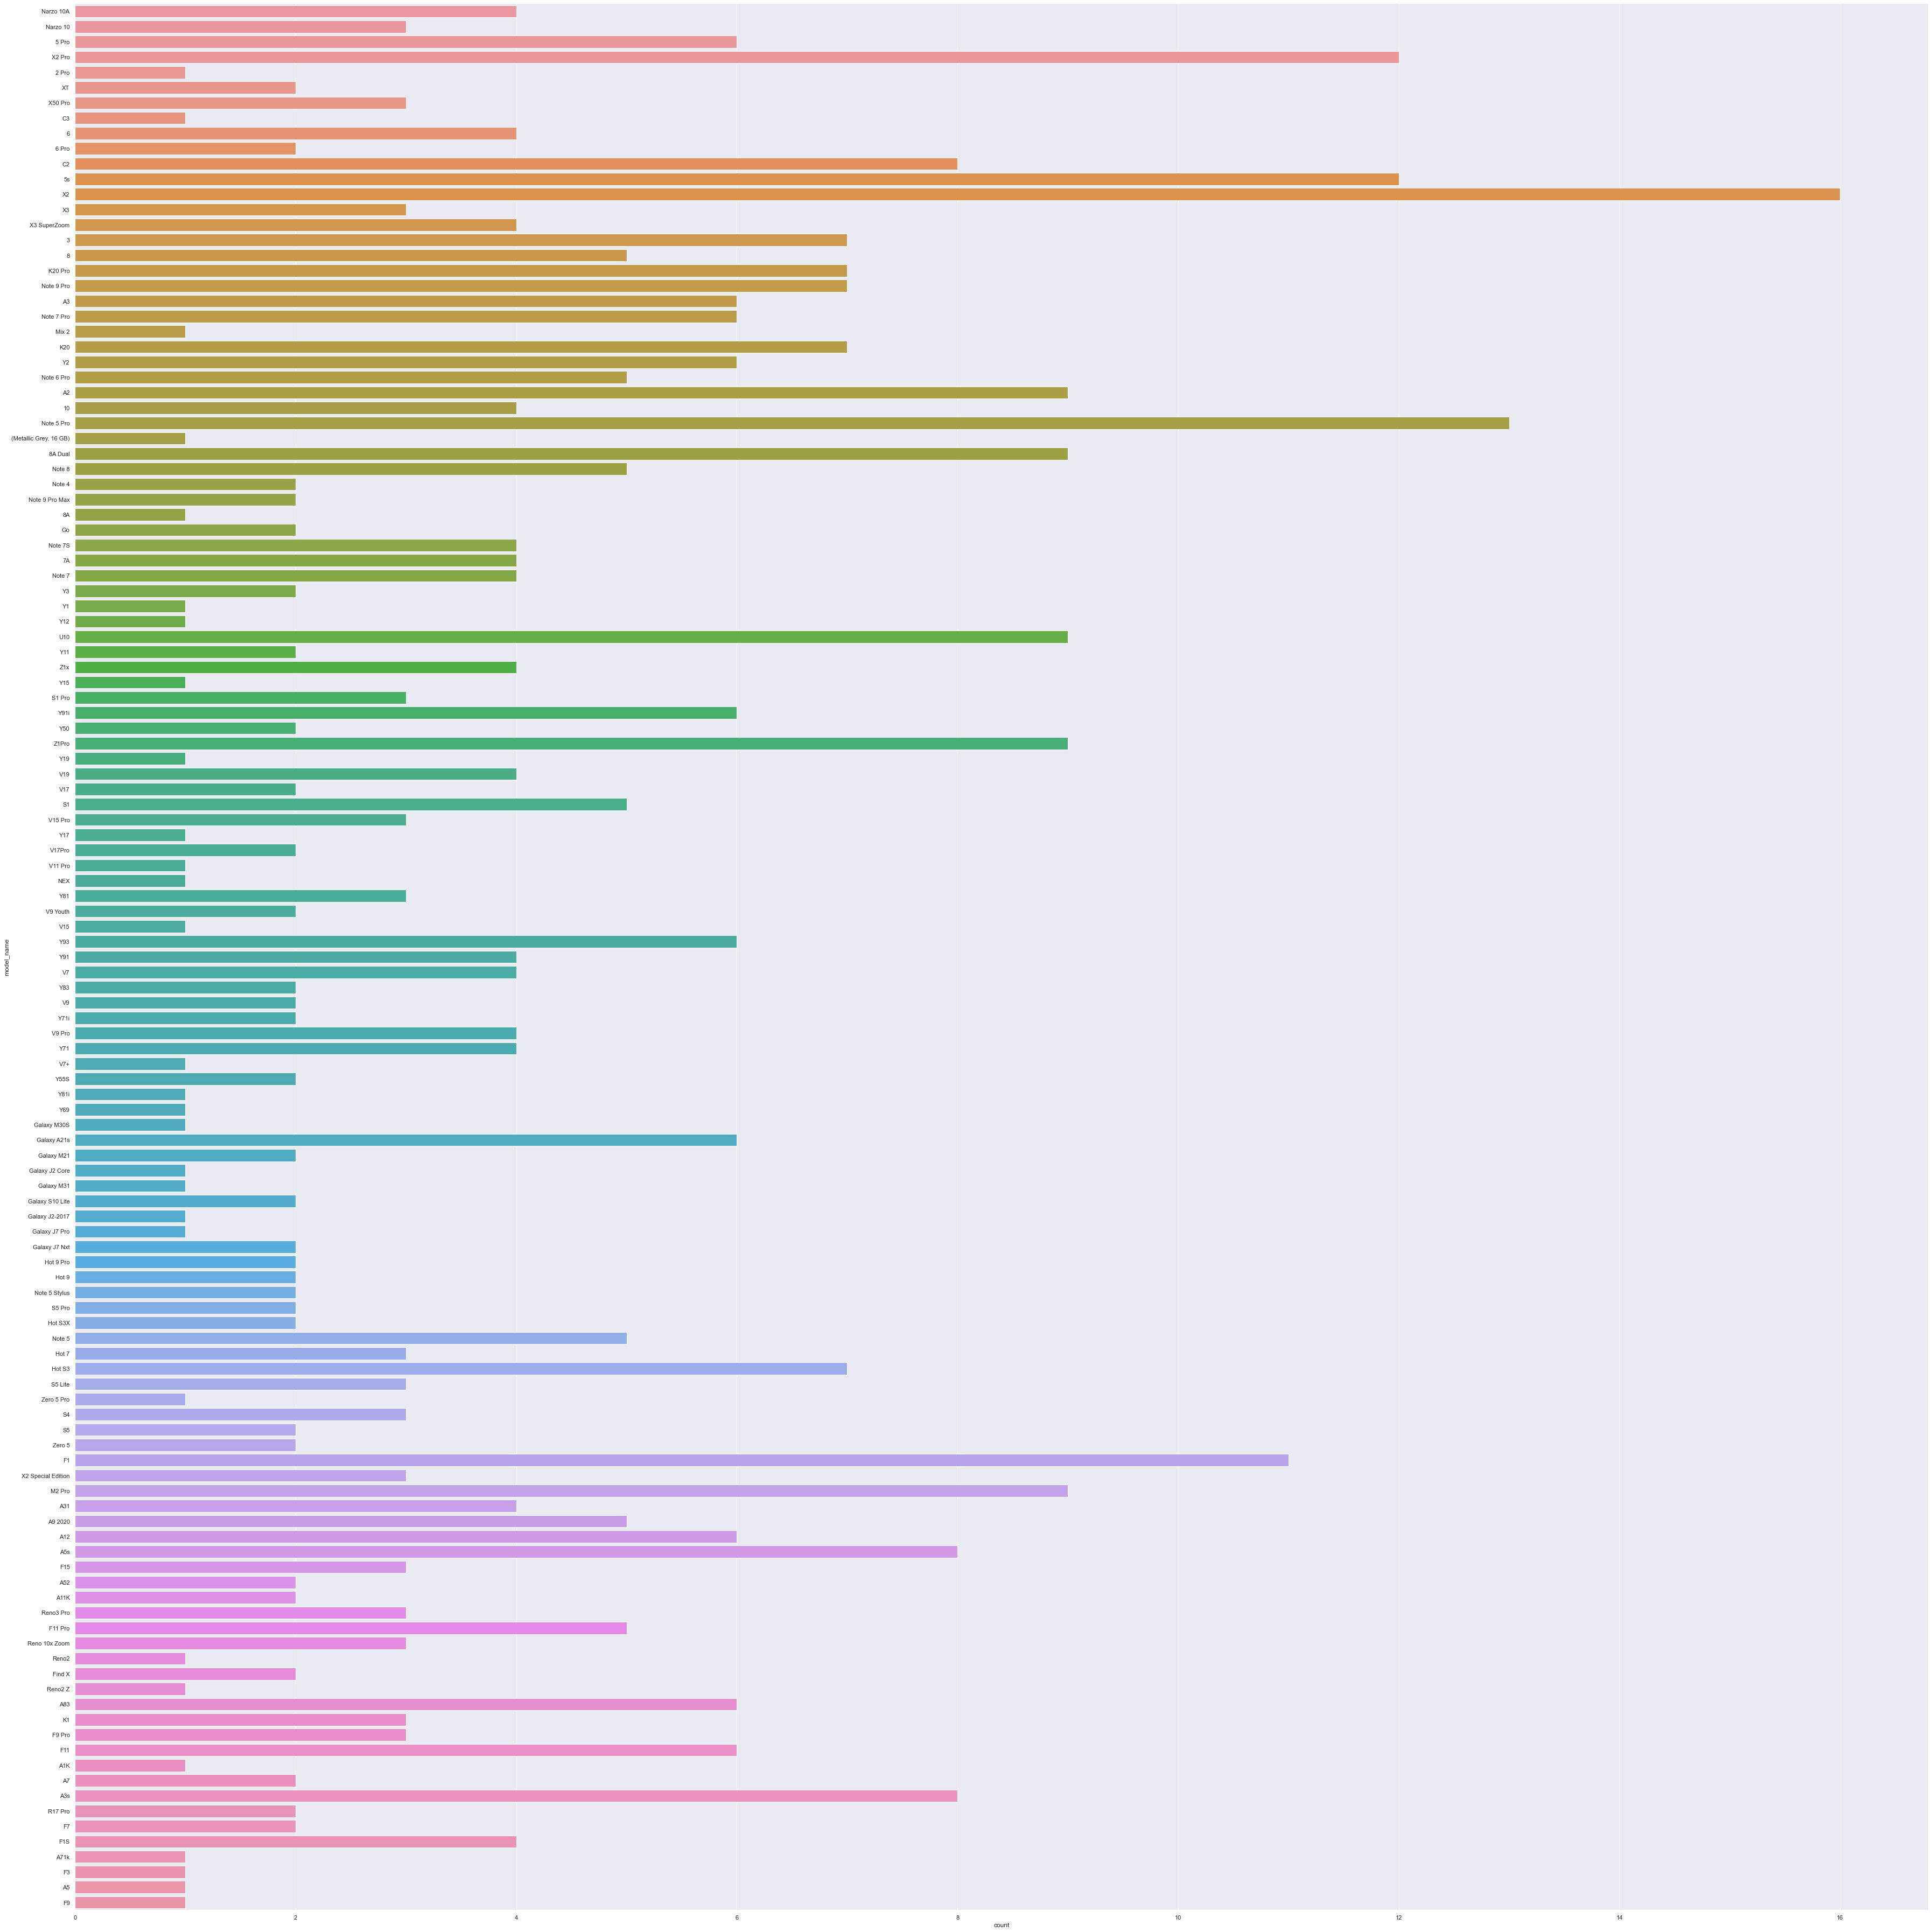

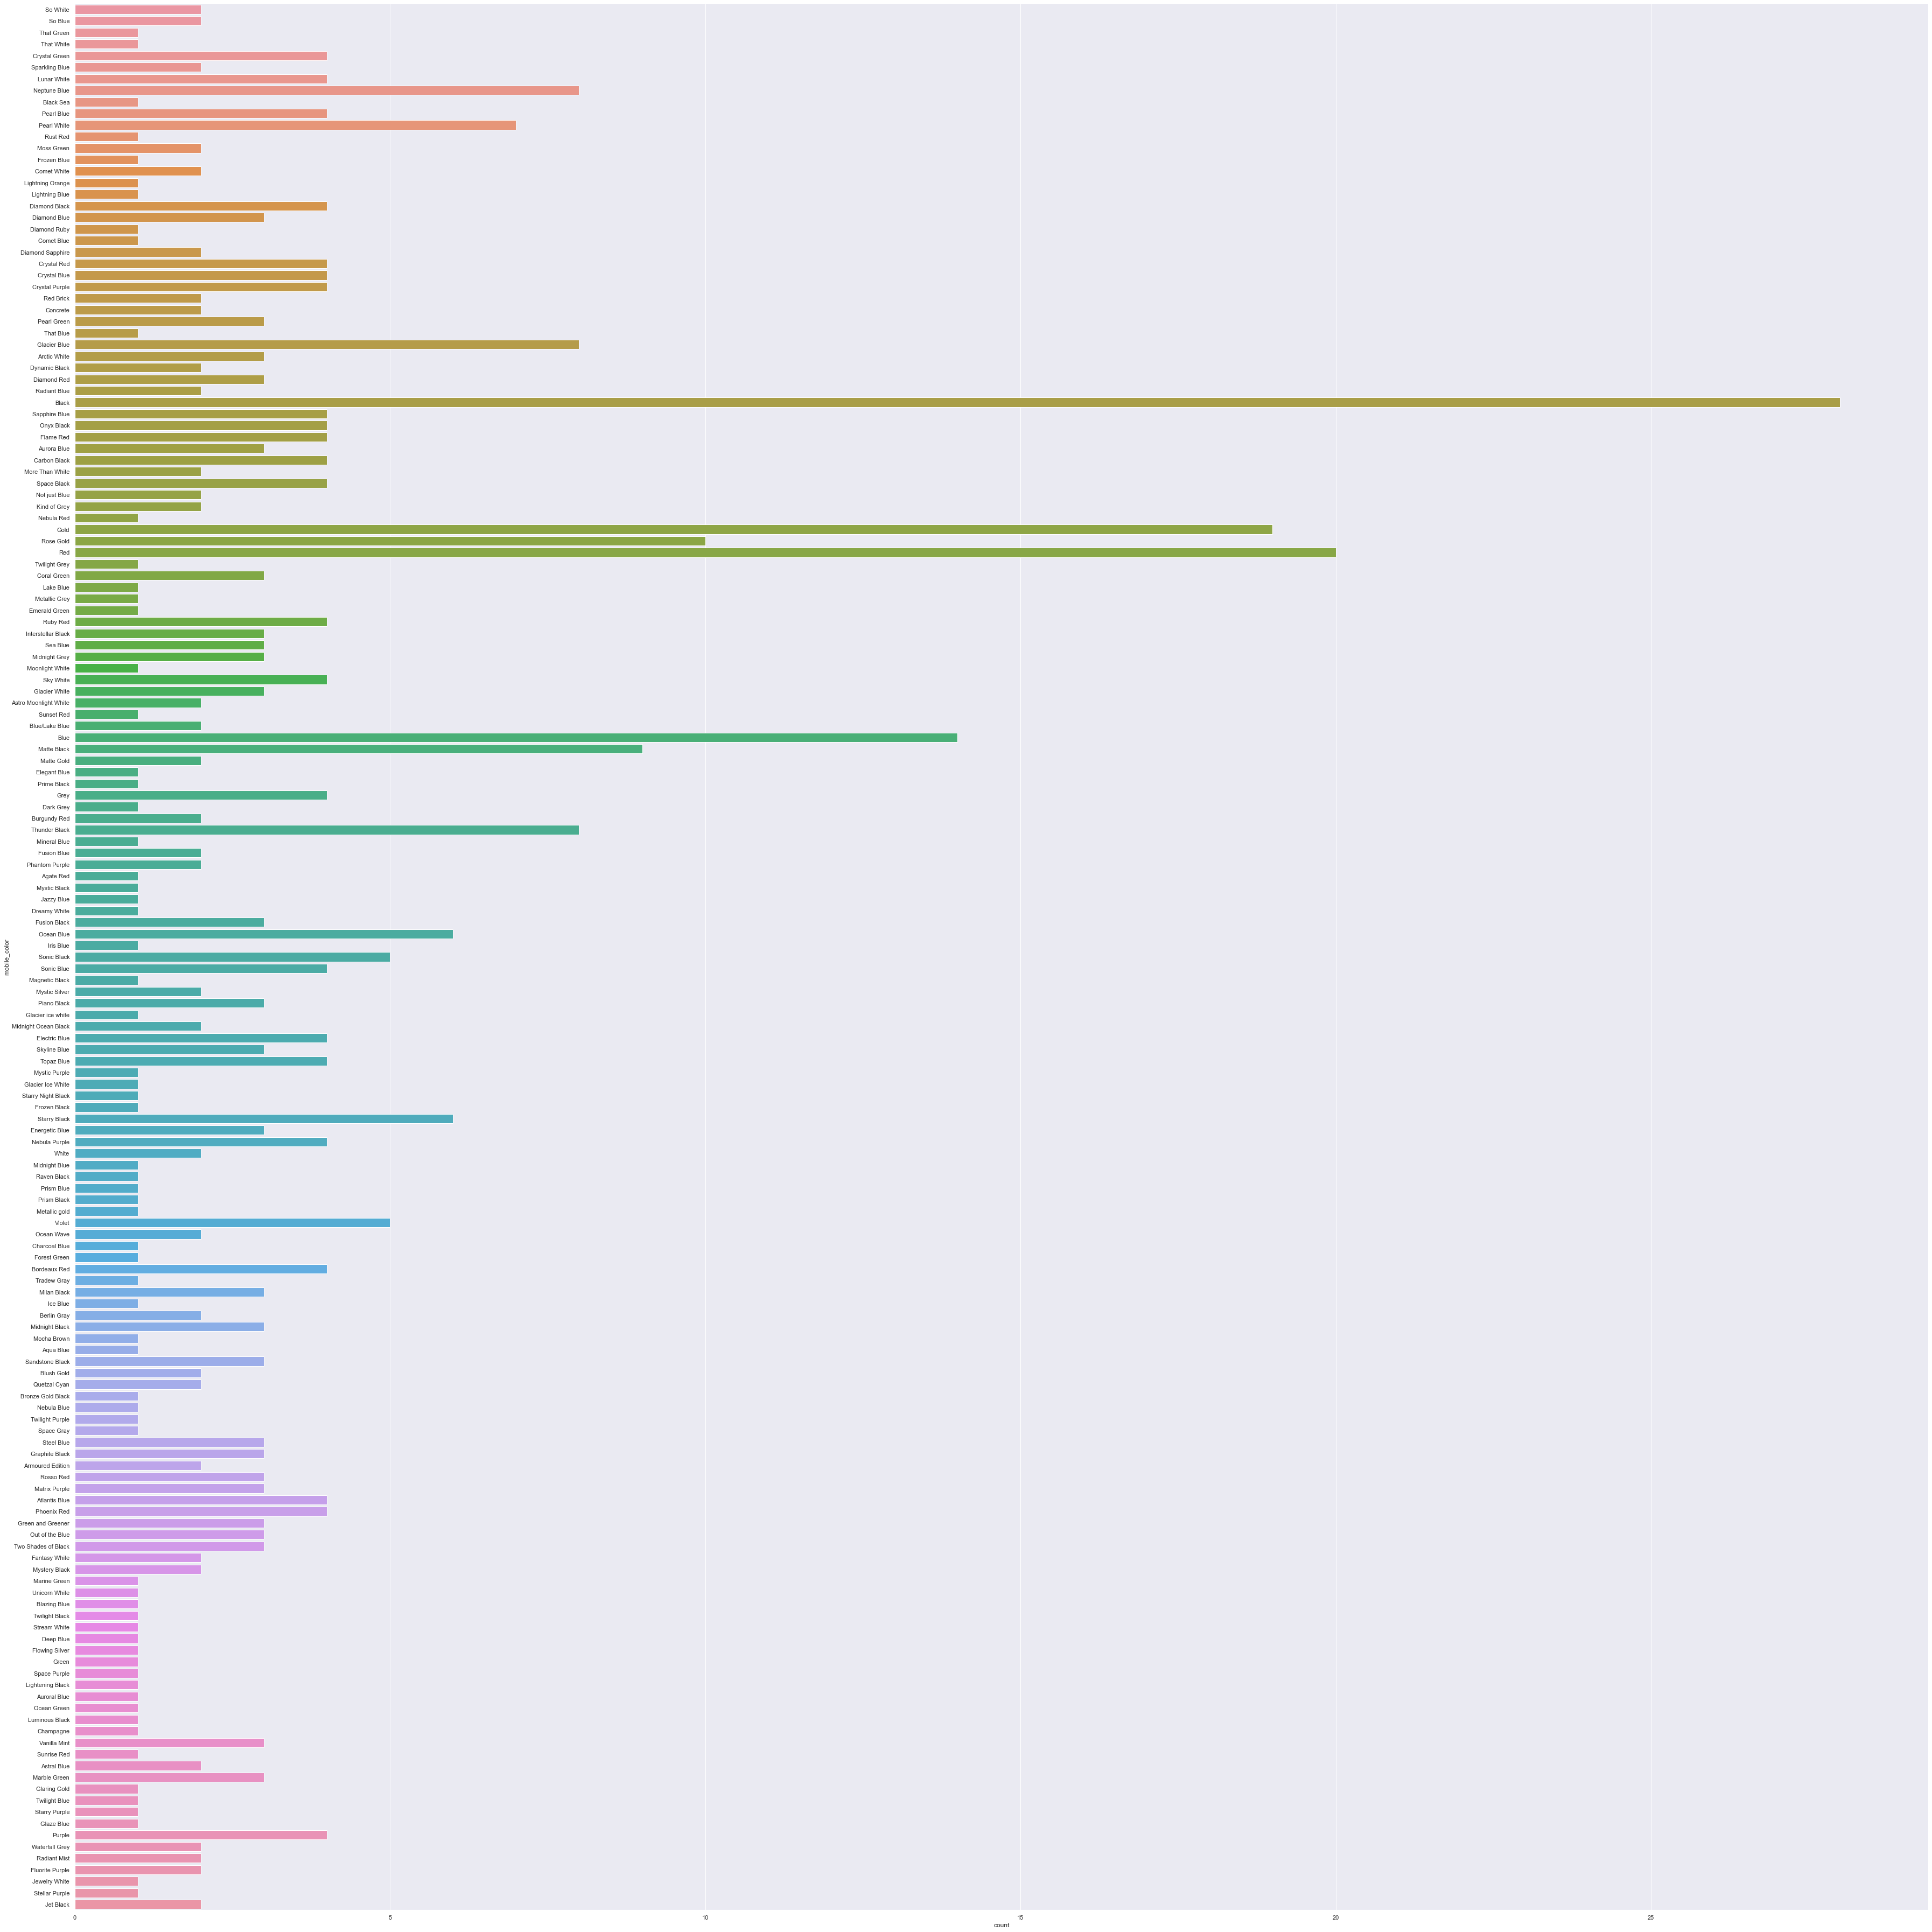

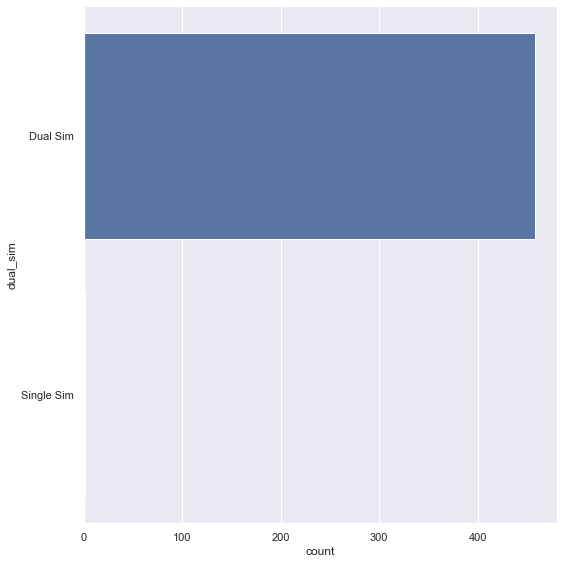

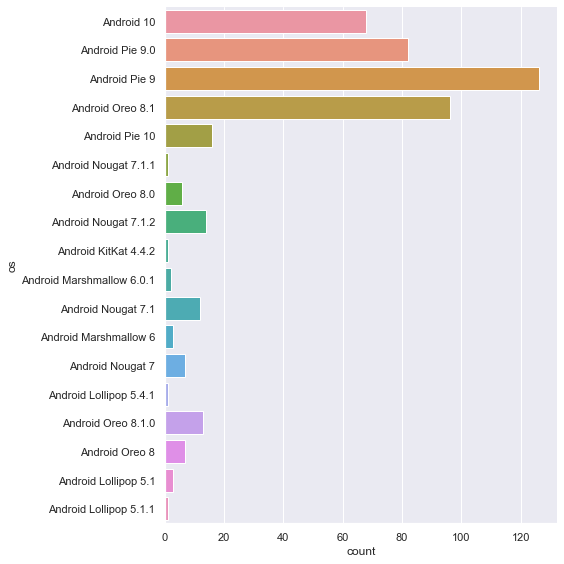

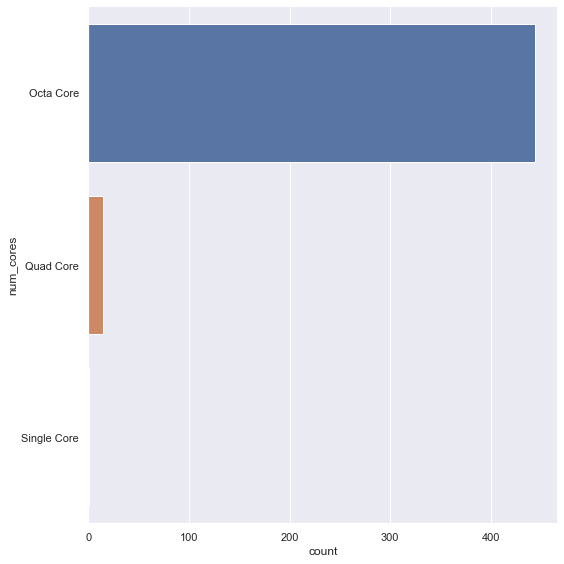

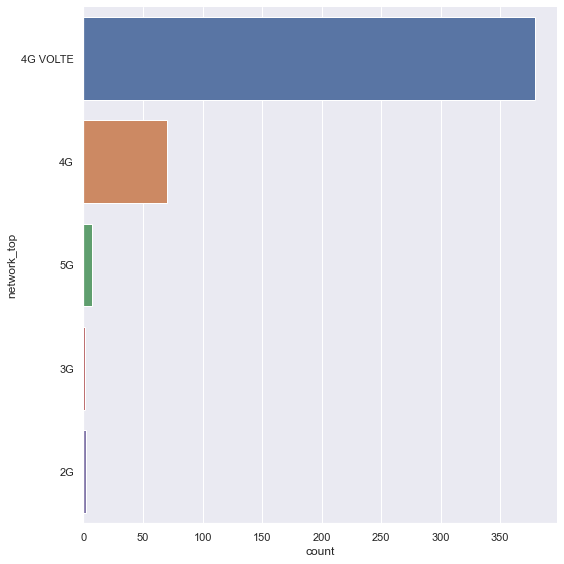

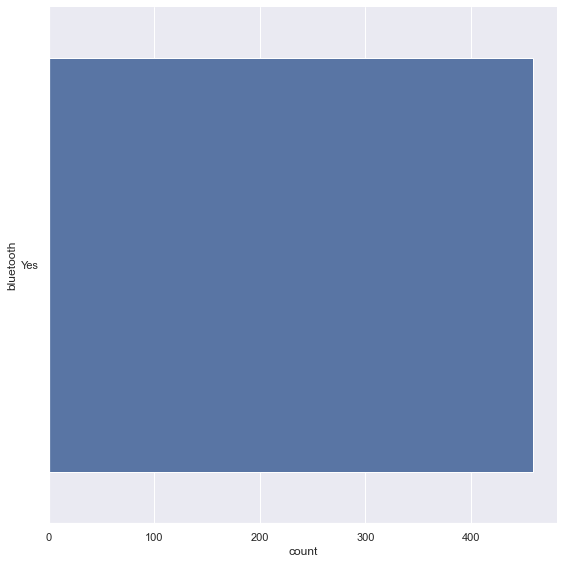

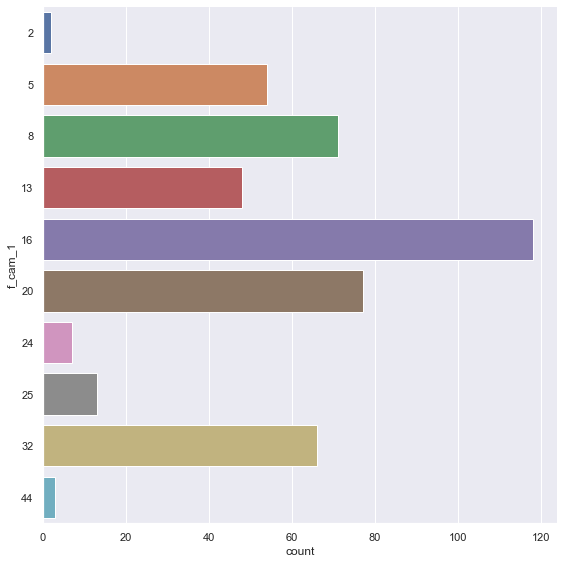

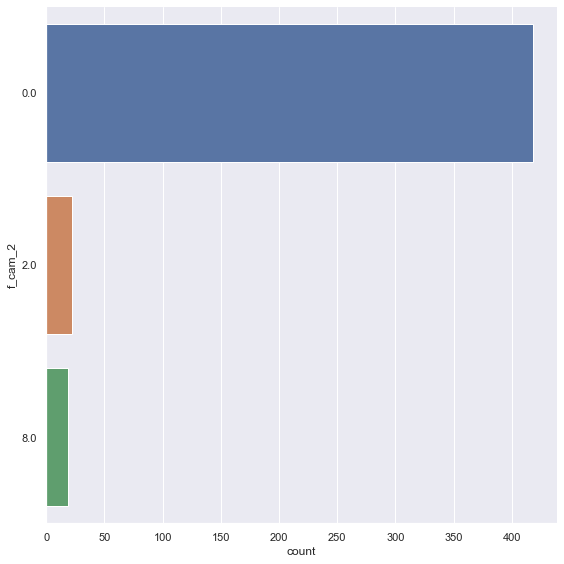

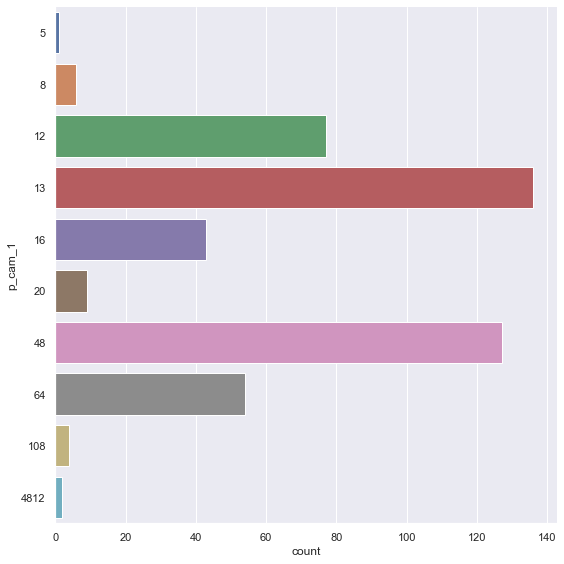

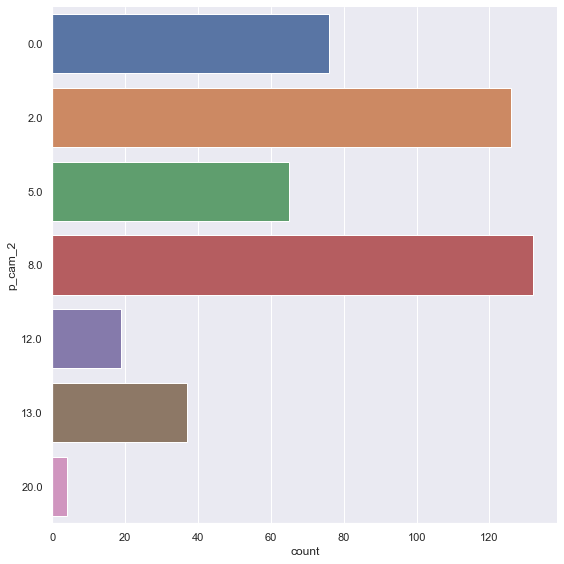

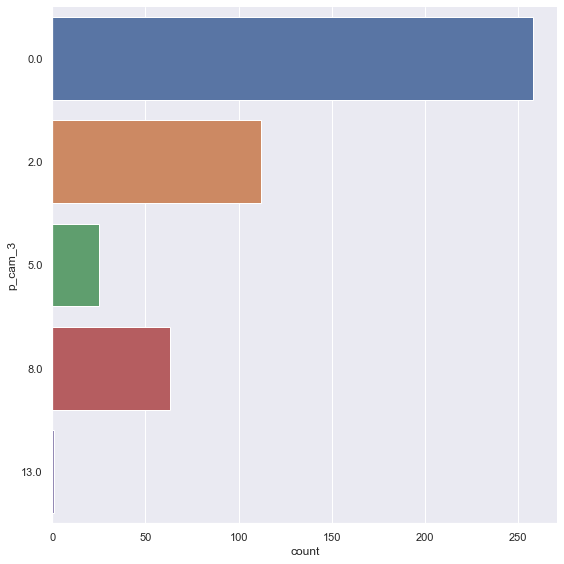

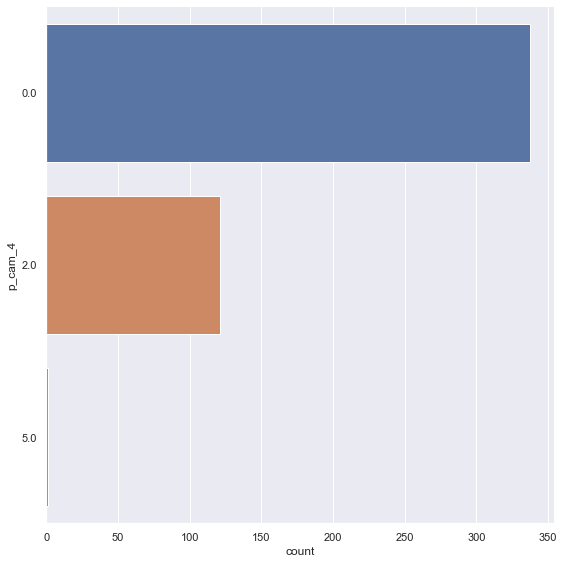

In [15]:
f, axes = plt.subplots(3, 1, figsize=(500,500))
count = 0
for var in mobileCatDataFrame:
    #print("Level of " + str(var)+" :", len(mobileData[var].unique()))
    #print(mobileData[var].value_counts())
    if(var == 'model_brand' or var =='model_name'  or var == 'mobile_color' ):
        h = 50
    else:
        h = 8
    sb.catplot(y = str(var), data = mobileCatDataFrame, kind = "count", height = h)
    count += 1

In [16]:
#Quantity in each class for Categorical Veriable
for var in mobileCatDataFrame:
    print("Level of " + str(var)+" :", len(mobileData[var].unique()))
    print(mobileData[var].value_counts())
    print("\n")
 

Level of mobile_brand : 9
Vivo       96
Redmi      93
OPPO       86
Realme     79
Infinix    36
POCO       31
Mi         20
Samsung    17
MI3         1
Name: mobile_brand, dtype: int64


Level of model_name : 125
X2                16
Note 5 Pro        13
X2 Pro            12
5s                12
F1                11
                  ..
Galaxy M31         1
Galaxy J2-2017     1
Galaxy J7 Pro      1
Zero 5 Pro         1
F9                 1
Name: model_name, Length: 125, dtype: int64


Level of mobile_color : 165
Black              28
Red                20
Gold               19
Blue               14
Rose Gold          10
                   ..
Emerald Green       1
Forest Green        1
Charcoal Blue       1
Moonlight White     1
Twilight Purple     1
Name: mobile_color, Length: 165, dtype: int64


Level of dual_sim : 2
Dual Sim      458
Single Sim      1
Name: dual_sim, dtype: int64


Level of os : 18
Android Pie 9                126
Android Oreo 8.1              96
Android Pie 9.0     

RedMi, vivo and OPPO have developed similarly more phones than the rest.
MI3 have least phone model produced probably due to lower demand

Only 1 phone has Single Simcard while the rest have duoSimcard due to the trending of duoSim in phones

Majority 444 models have Octa core processor also probably due to the trend and people like their phone working faster

In terms of network, most phone use 4G VOLTE network while only 7 uses 5G which is significantly faster. But with the development of technology from the R&D department of the company, they are trying to catch up but most are still stuck at 4G VOLTE while some has been completely left out like those with 3G and 2G

Every phone now has Bluetooth feature

In terms of camera, it is not necessarily the more the better, although it can be a determining factor in predicting the mobile_price, most company just accommodate their need and build moderate number for camera on their phone

Black colour has the most preference


# Clustering EDA

<AxesSubplot:xlabel='mobile_brand', ylabel='disp_size'>

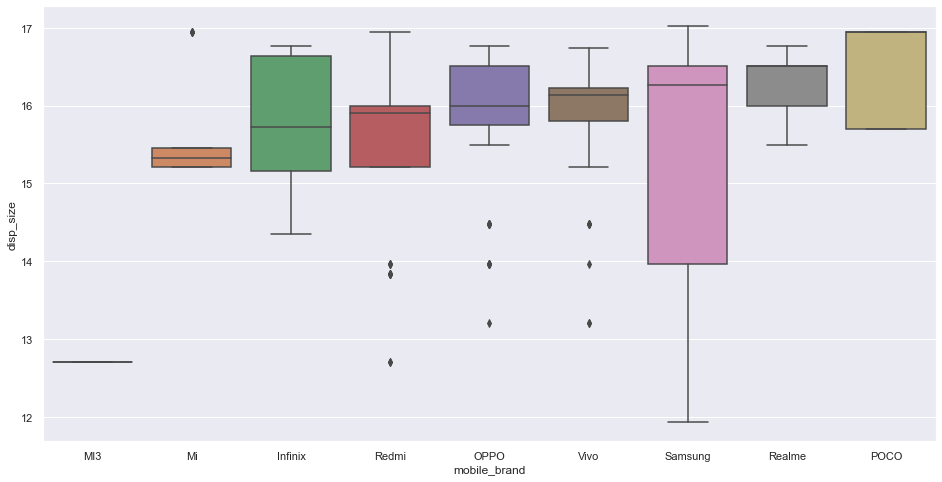

In [17]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'disp_size', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['disp_size'].median().sort_values().index)


POCO's disp_size is highly standardized and has the largest median of disp_size (medien is overlapped with Q3) with very clean data compared to the rest. 

POCO is followed by Realme where it's median is also overlapped with Q3, Realme is also quite standardized in terms of data spread as it does not have any outliers too.

Samsung has the largest range of disp_size values.

Overall, if a value of disp_size is given, we would guess it belongs to Samsung as it covers the most range. The varietion in disp_size by medien of all the brands are also quite differentiable. So there is a relation of disp_size and mobile_brand. mobile_brand can be a relevent factor in deciding the disp_size.

<AxesSubplot:xlabel='mobile_brand', ylabel='mp_speed'>

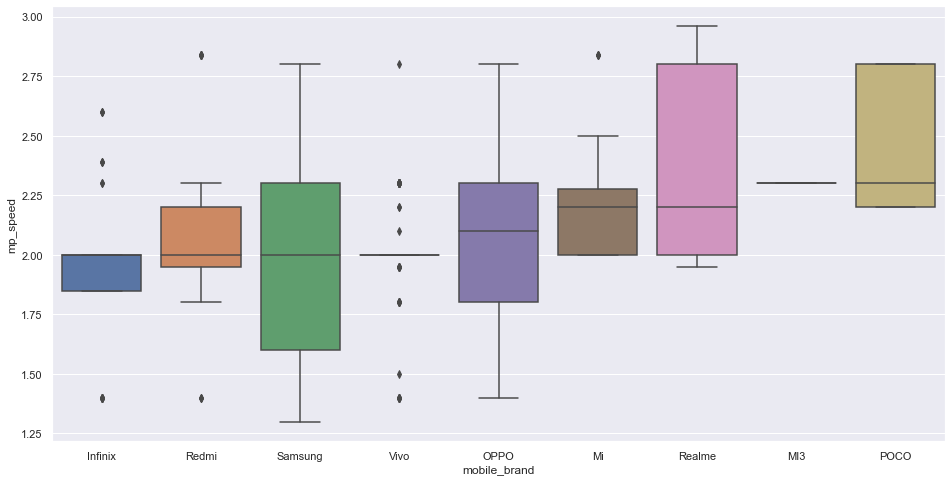

In [18]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mp_speed', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mp_speed'].median().sort_values().index)


mp_speed can be seperated into 3 sections having almost the same speed for each brand in each section:

High: POCO(Highest) & MI3

Medium: Realme & Mi & OPPO

Low: Vivo & Samsung & Redmi & Infinix(Slowest)

Hence, if given a mp_speed value, it is very difficult to determine which phone it belongs to, but we at least know which category it might fall into.

<AxesSubplot:xlabel='mobile_brand', ylabel='int_memory'>

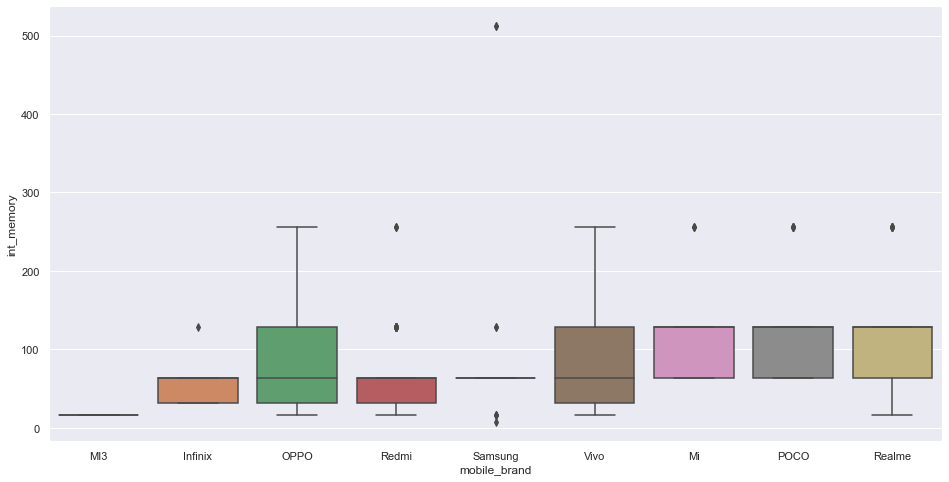

In [19]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'int_memory', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['int_memory'].median().sort_values().index)


All the phone does not show too much variation in int_memory(internal memory). Internal Memory specificatipon is very standardized. 

<AxesSubplot:xlabel='mobile_brand', ylabel='ram'>

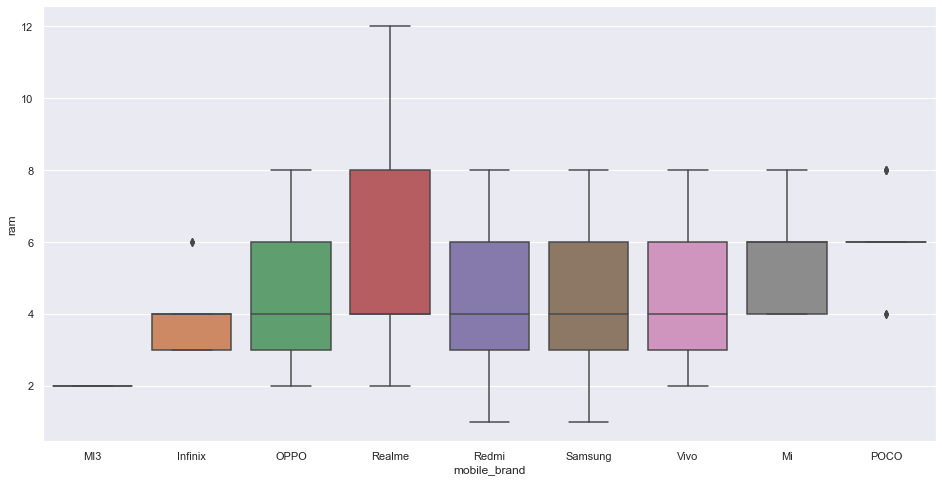

In [20]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'ram', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['ram'].median().sort_values().index)


POCO has the most distinctive highest ram among the rest which can be easilly identified if given a value of high ram.
MI3 has the most distinctive lowest ram among the rest which can be easilly identified if given value is extremely low.

Overall, ram values does not have a strong relationship with mobile_brand.

<AxesSubplot:xlabel='mobile_brand', ylabel='battery_power'>

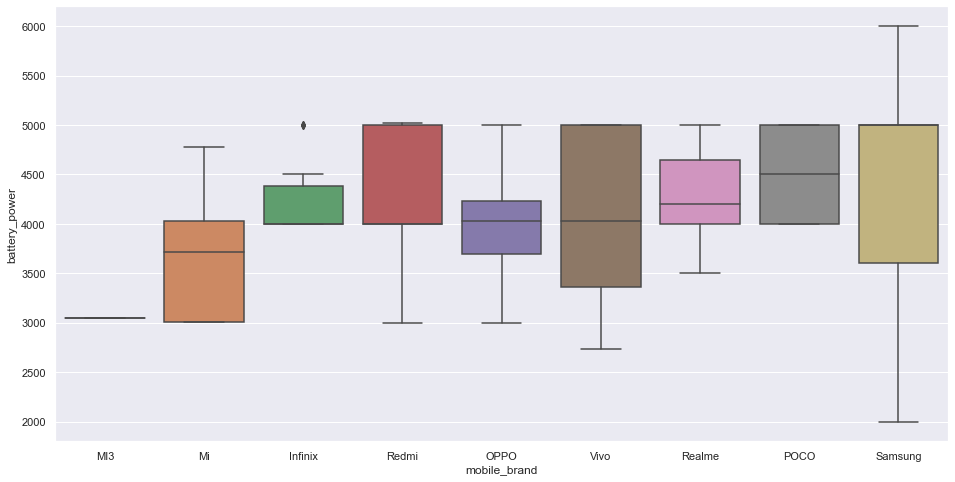

In [21]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'battery_power', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['battery_power'].median().sort_values().index)


Samsung has highest but also most wide spread of battery power values due to more models being sampled while MI3 has the lowest battery_power.

There is a clear partition of mobile_brands using battery_power values for classification in general but Infinix, Redmi & OPPO is very close to each other.

<AxesSubplot:xlabel='mobile_brand', ylabel='mob_width'>

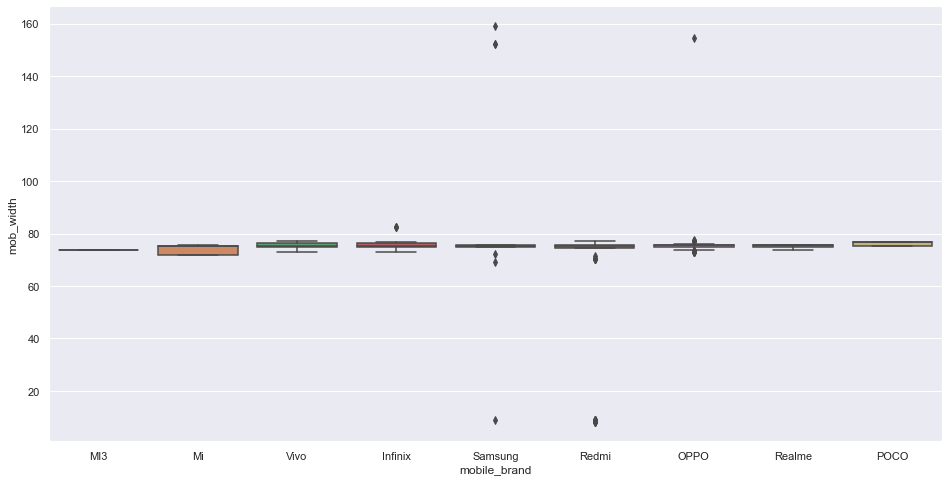

In [22]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mob_width', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_width'].median().sort_values().index)


<AxesSubplot:xlabel='mobile_brand', ylabel='mob_height'>

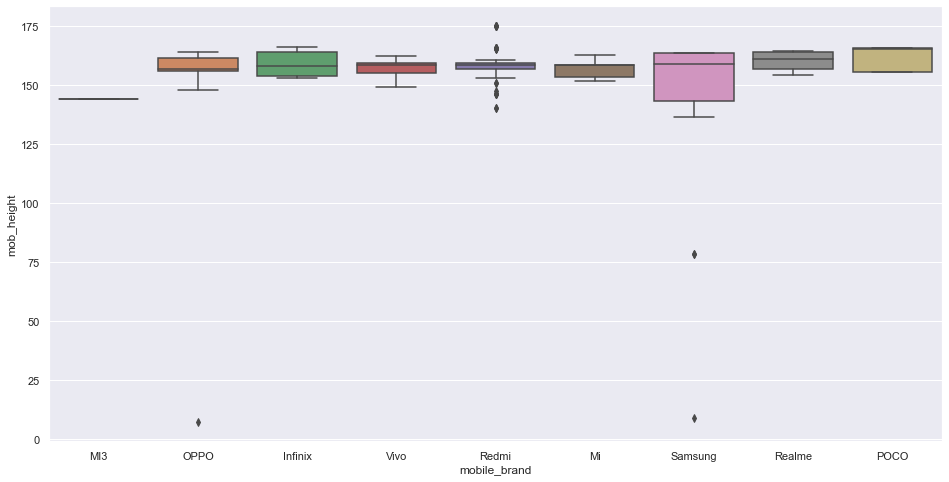

In [23]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mob_height', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_height'].median().sort_values().index)


<AxesSubplot:xlabel='mobile_brand', ylabel='mob_depth'>

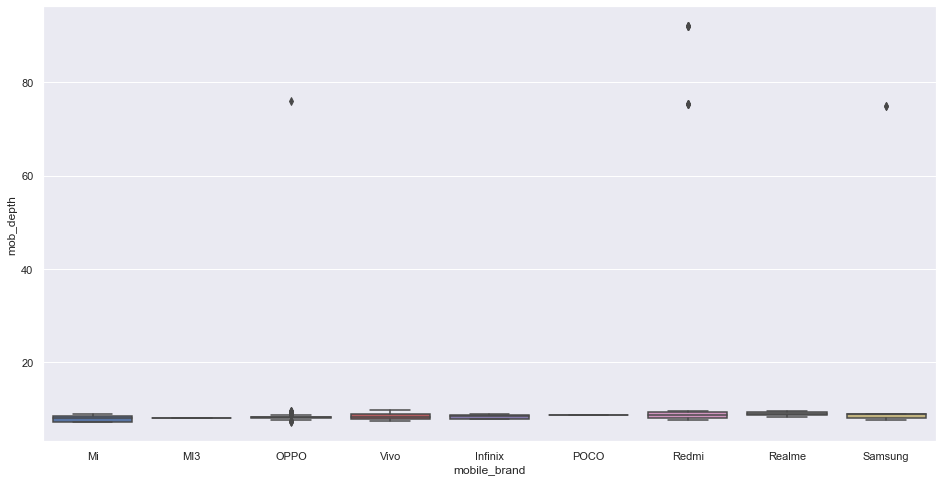

In [24]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mob_depth', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_depth'].median().sort_values().index)


mobile_width,mobile_height,mobile_depth has almost no relation in determining and classifying the brand of mobil phone. Samsung, Realme and OPPO has ceated some reall bizarre phones with extreme width,height,depth values.

<AxesSubplot:xlabel='mobile_brand', ylabel='mob_weight'>

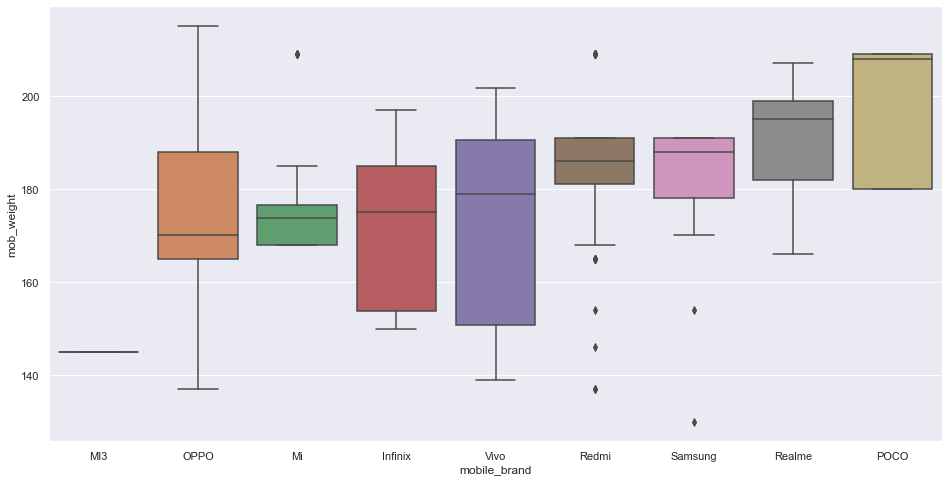

In [25]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mob_weight', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_weight'].median().sort_values().index)


except for OPPO,Mi,Infinix, and Vivo, the mob_weight has some distinct patterns in each brands of phones. To a certain extent, mob_weight can be a predictor for classifying the mobile phones.

<AxesSubplot:xlabel='mobile_brand', ylabel='resolution_width'>

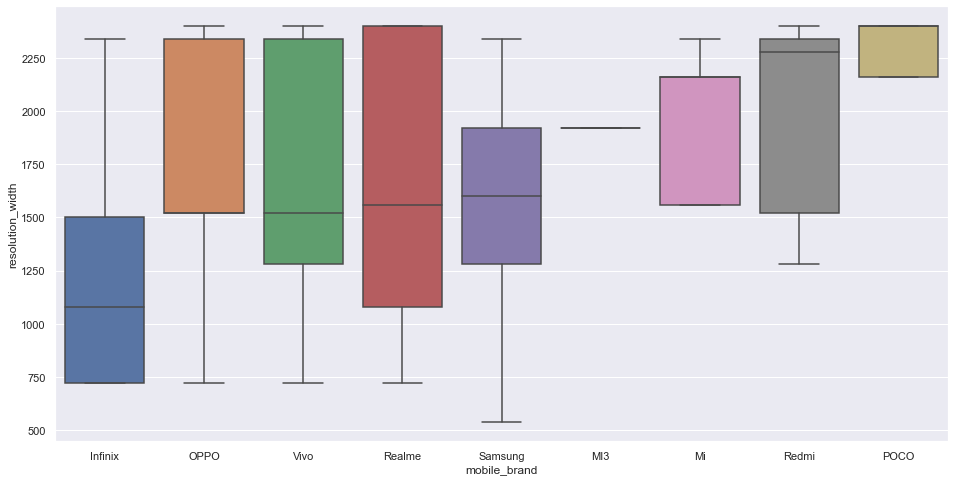

In [26]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'resolution_width', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['resolution_width'].median().sort_values().index)


Except for OPPO,VIVO,Realme and Samsung, the other phone brands has clear distinct values of resolution_width, hence resolution_width has a decent relation with phoine brands to a certain extent.

<AxesSubplot:xlabel='mobile_brand', ylabel='resolution_height'>

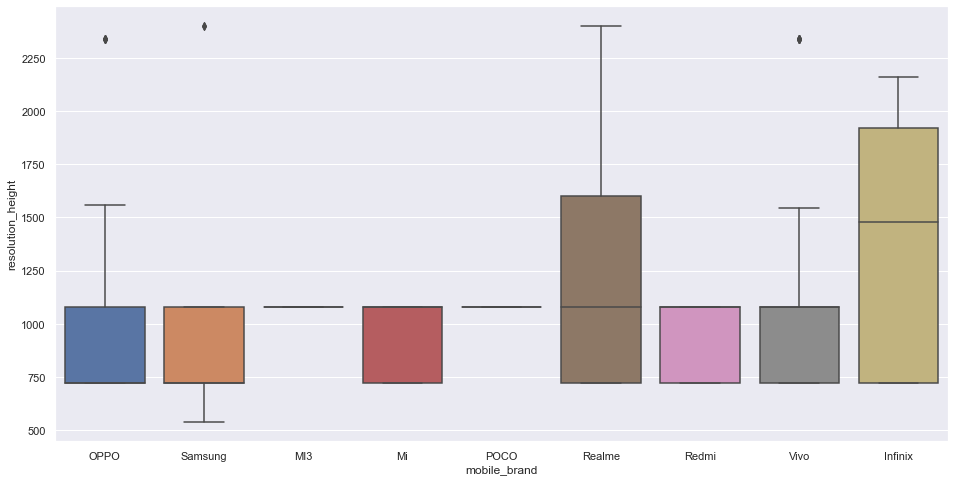

In [27]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'resolution_height', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['resolution_height'].median().sort_values().index)


The values of resolution width is almost the same with every phone brand. Hence it has no relation with mobile_brand

<AxesSubplot:xlabel='mobile_brand', ylabel='mobile_price'>

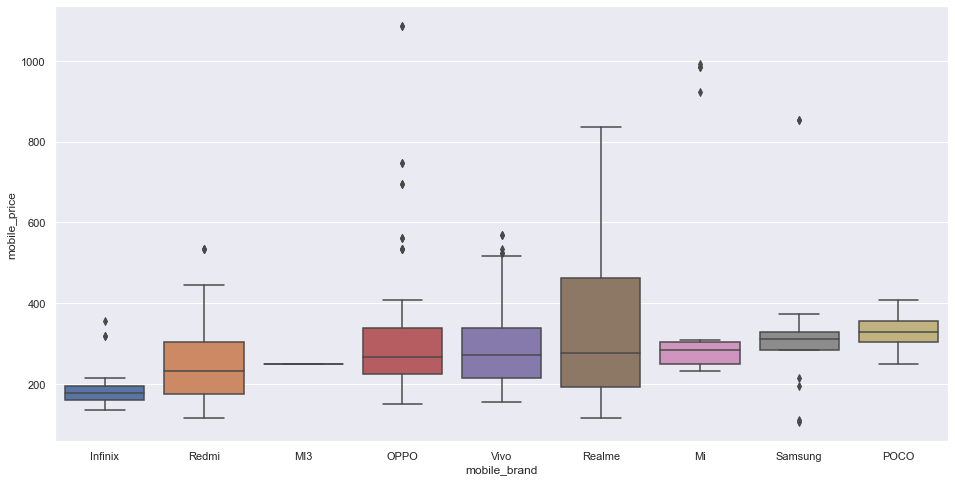

In [28]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mobile_price'].median().sort_values().index)


POCO, Samsung, Mi has norrow range for mobile_price. It's spread is lower and also more expensive compared to others.

Realme,Vivo,OPPO and Redmi has wider range of phone prices(quality is more variant)

Infinix has lower price in general and also narrower range(less spread)

mobile_price is quite standardized for every phone brand.

<AxesSubplot:xlabel='mobile_brand', ylabel='os'>

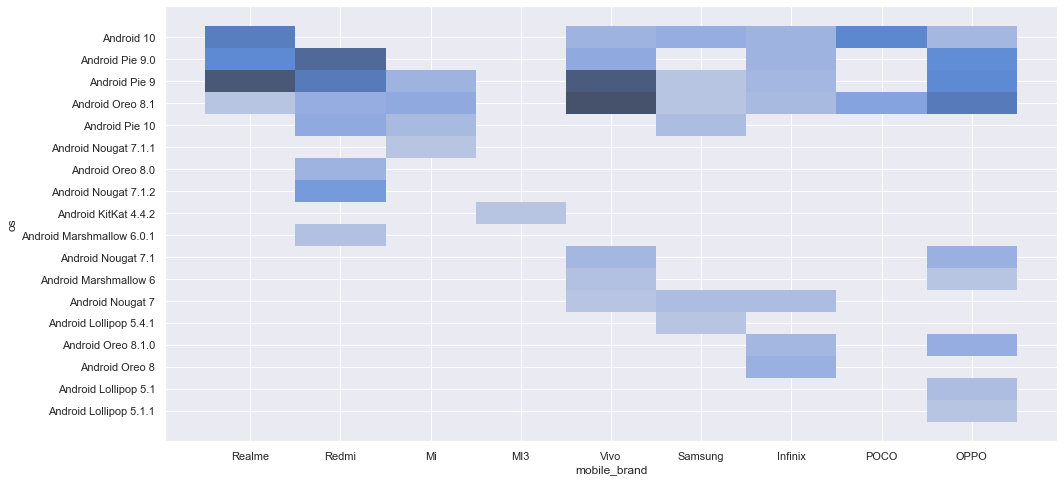

In [33]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'os', data = mobileData)

Mojority of the phone uses Andriod10, AndriodPie9.0,AndriodPie9 and Andriod Oreo 8.1

Some odd ones are used by OPPO, Infinix and Samsung

<AxesSubplot:xlabel='mobile_brand', ylabel='num_cores'>

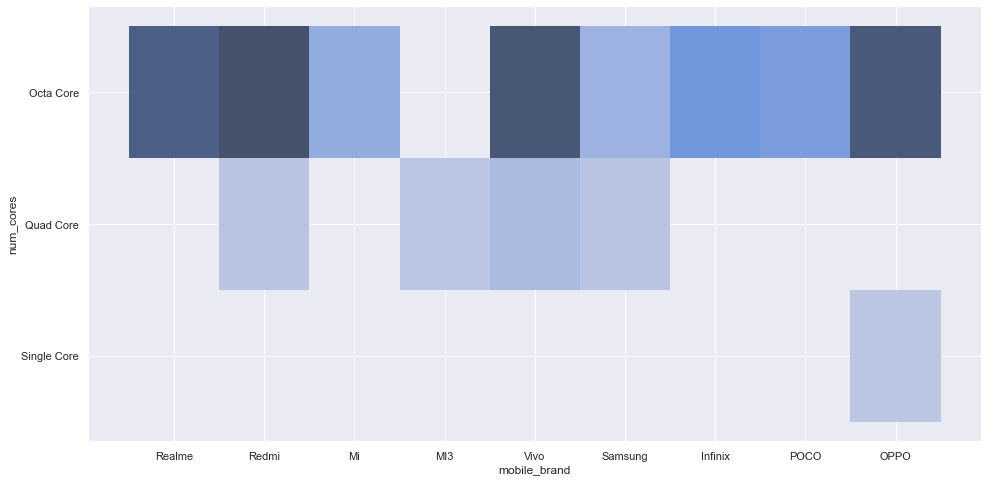

In [35]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'num_cores', data = mobileData)

Majority are Octa Core, some are Quad Core but only OPPO produces Single Core machine.

<AxesSubplot:xlabel='mobile_brand', ylabel='network_top'>

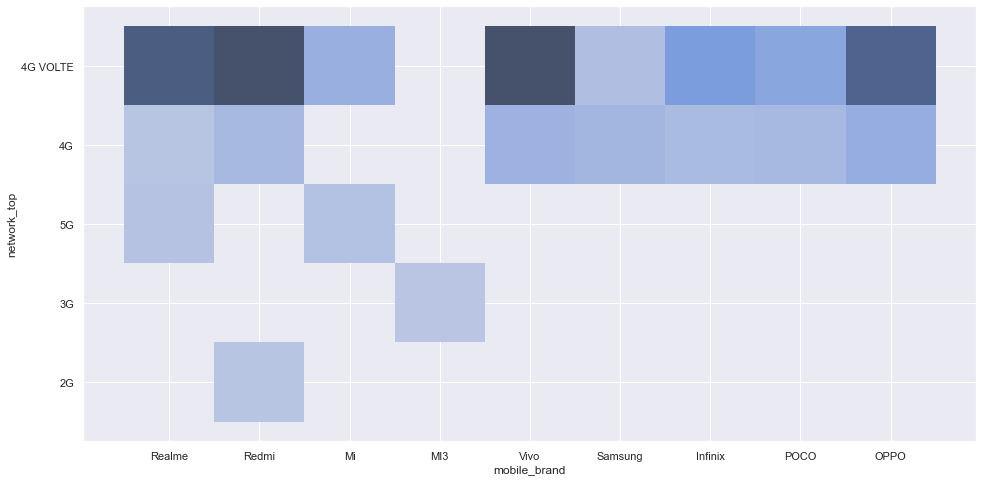

In [36]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'network_top', data = mobileData)

Most Phone are standardized at using 4G Volte network system

Rare and more advanced brands like Mi and Realme able to access 5G technology

Only MI3 uses 3G phone while Redmi produces some 2G phone aside majoring in produccing phones in 4G Volte 

<AxesSubplot:xlabel='mobile_brand', ylabel='bluetooth'>

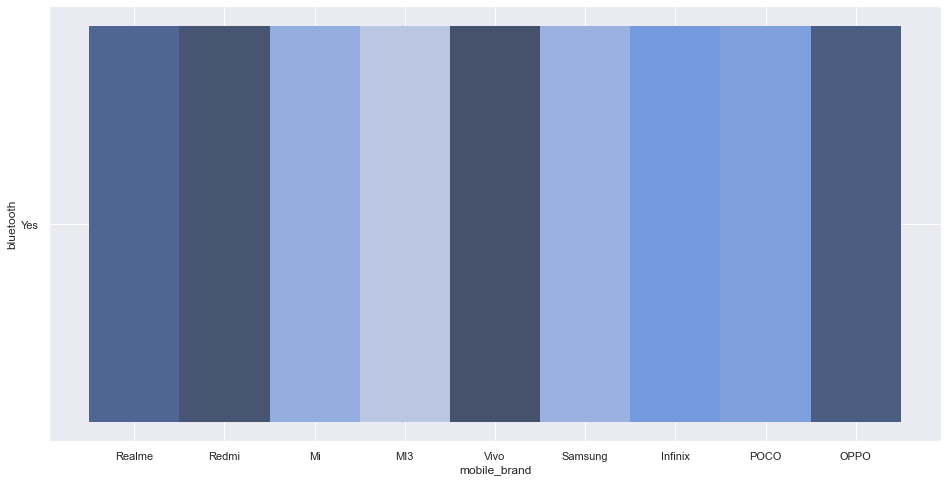

In [37]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'bluetooth', data = mobileData)

All Phone has bluetooth

<AxesSubplot:xlabel='mobile_brand', ylabel='f_cam_1'>

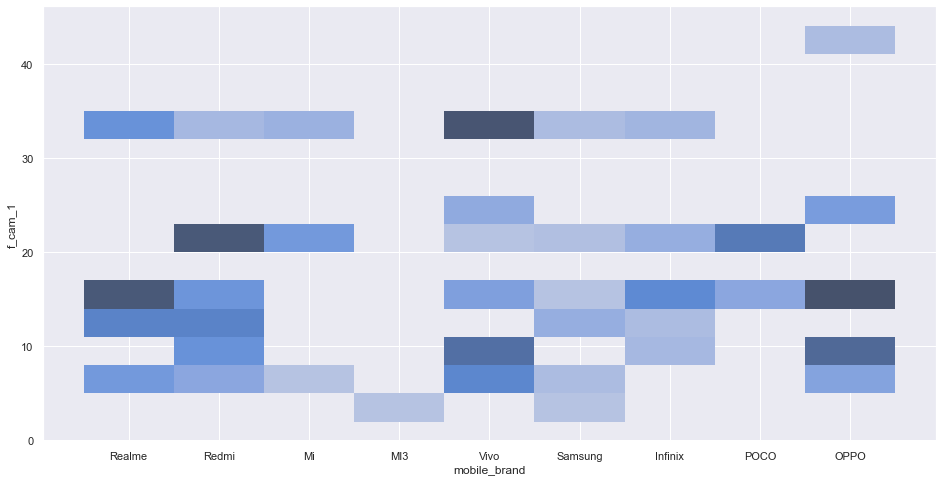

In [38]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'f_cam_1', data = mobileData)

Most phone has little more than 20 f_cam_1 but the spread of f_cam_1 is quite standardized for all the phones in general.

<AxesSubplot:xlabel='mobile_brand', ylabel='f_cam_2'>

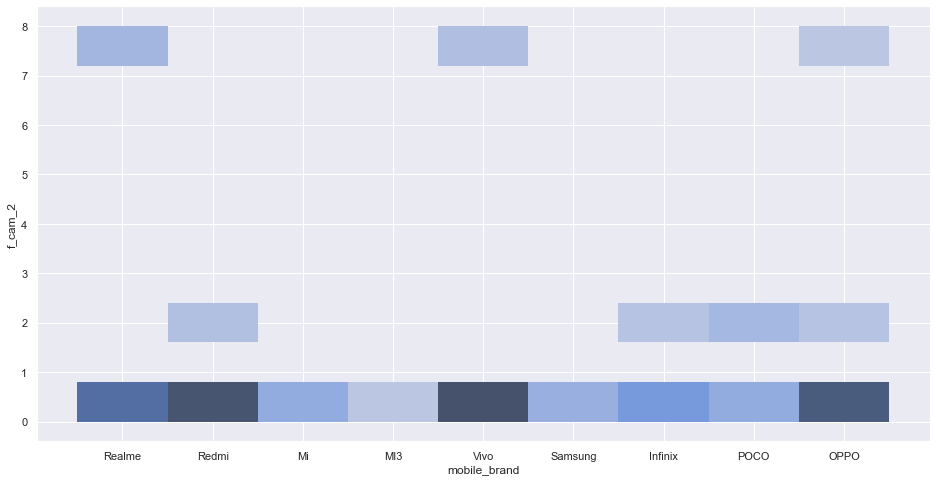

In [39]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'f_cam_2', data = mobileData)

Most phone do not have f_cam_2

<AxesSubplot:xlabel='mobile_brand', ylabel='p_cam_1'>

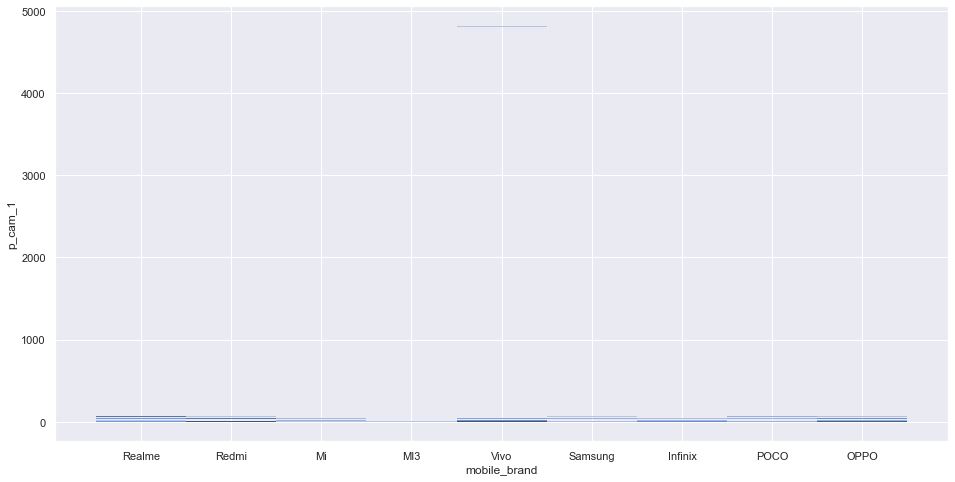

In [40]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'p_cam_1', data = mobileData)

The odd ones is VIVO that has extreme large number of p_cam_1

<AxesSubplot:xlabel='mobile_brand', ylabel='p_cam_2'>

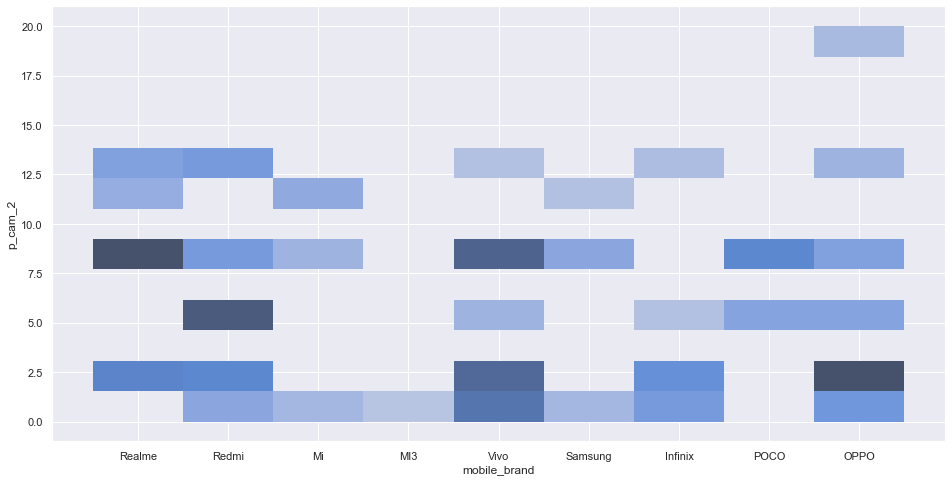

In [41]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'p_cam_2', data = mobileData)

<AxesSubplot:xlabel='mobile_brand', ylabel='p_cam_3'>

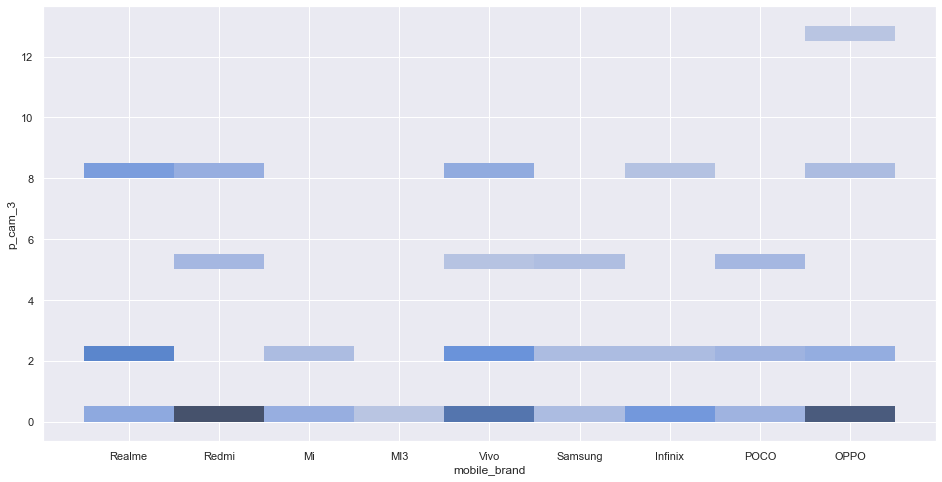

In [42]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'p_cam_3', data = mobileData)

p_cam_2 and p_cam_3 are quite standardized and even spread too for all the phones

<AxesSubplot:xlabel='mobile_brand', ylabel='p_cam_4'>

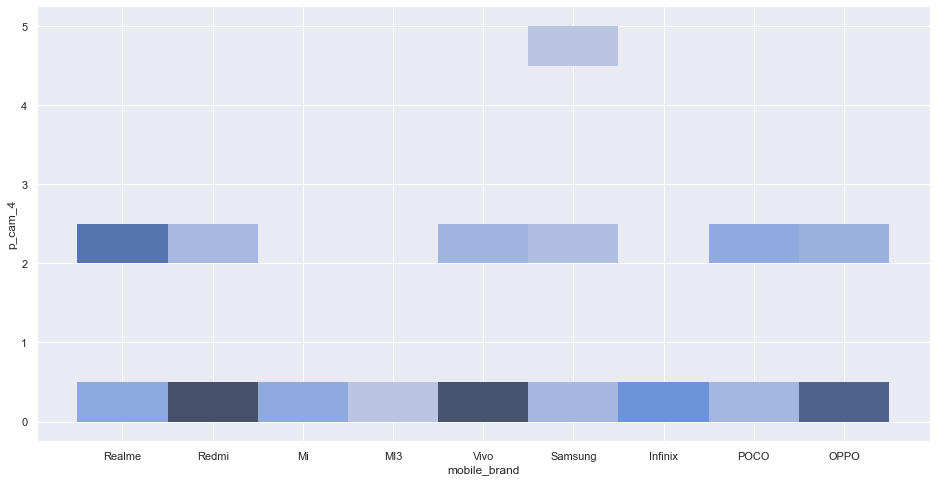

In [43]:
f = plt.figure(figsize=(16, 8))
sb.histplot(x = 'mobile_brand', y = 'p_cam_4', data = mobileData)

Quite evenly spread for all phone brands but some extreme value like Samsung has more number of p_cam_4

# Cat Data with Price

<AxesSubplot:xlabel='mobile_color', ylabel='mobile_price'>

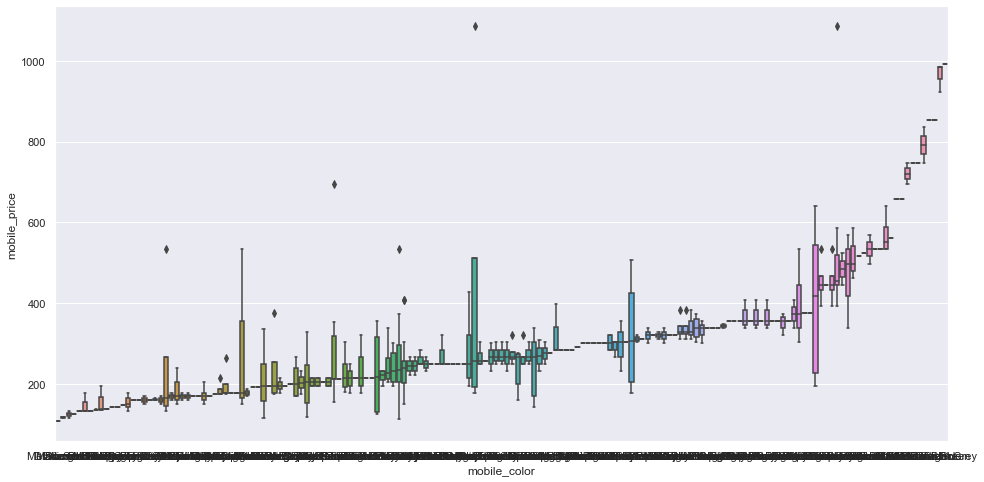

In [46]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_color', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('mobile_color')['mobile_price'].median().sort_values().index)



<AxesSubplot:xlabel='dual_sim', ylabel='mobile_price'>

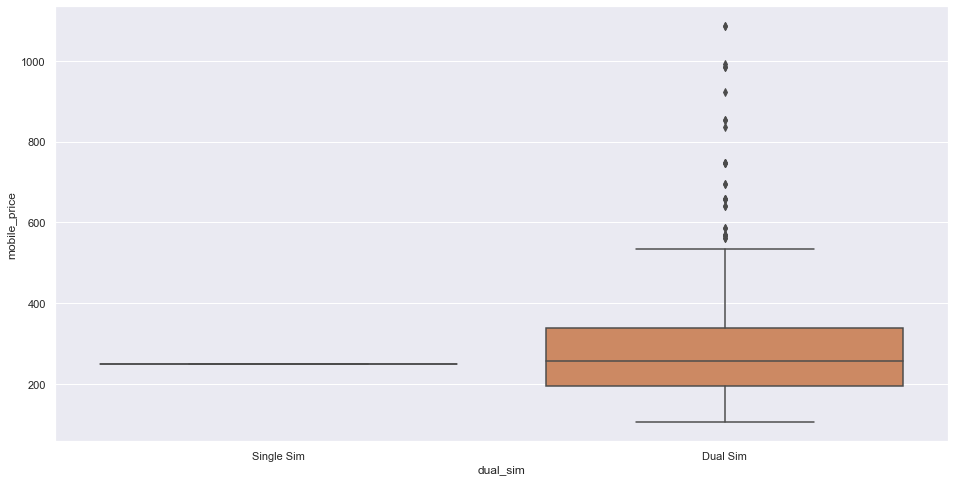

In [47]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x ='dual_sim', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('dual_sim')['mobile_price'].median().sort_values().index)

No relation as sample is not enough

<AxesSubplot:xlabel='os', ylabel='mobile_price'>

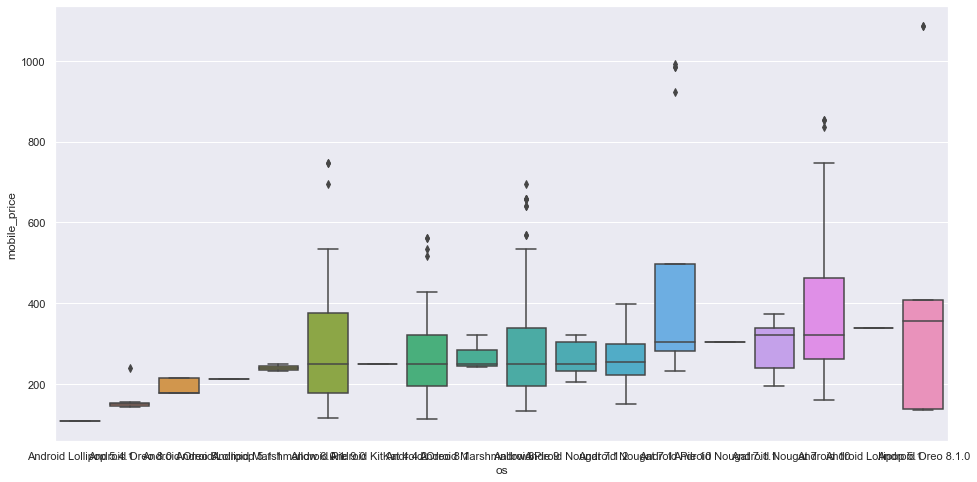

In [48]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'os', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('os')['mobile_price'].median().sort_values().index)

os is not a good predictor for mobile_price as ther is no any clear partition

<AxesSubplot:xlabel='num_cores', ylabel='mobile_price'>

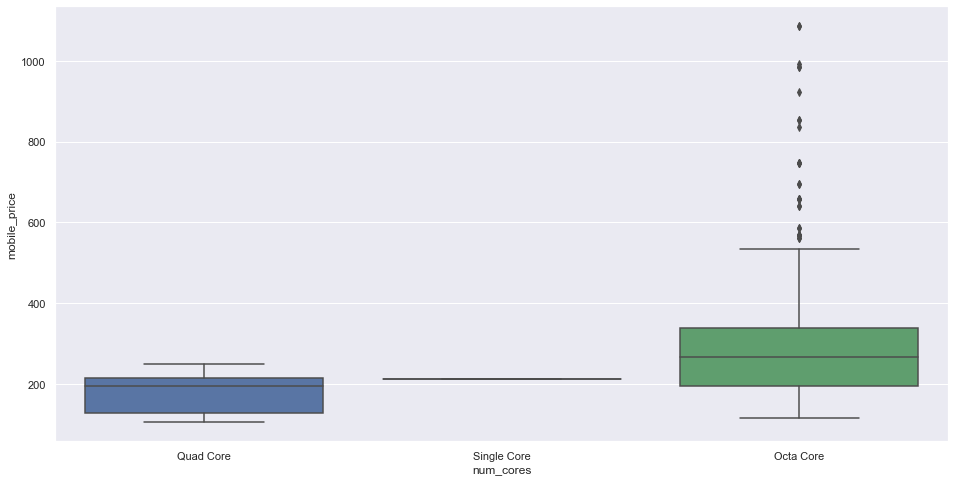

In [50]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'num_cores', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('num_cores')['mobile_price'].median().sort_values().index)

Octa Core is generally more expensive. hence it is easier to classify the price of the phone given an octacore or not

There is a faint relation between num_cores and mobile_price but the relation is even weaker between QuadCore and Single Core machine

<AxesSubplot:xlabel='network_top', ylabel='mobile_price'>

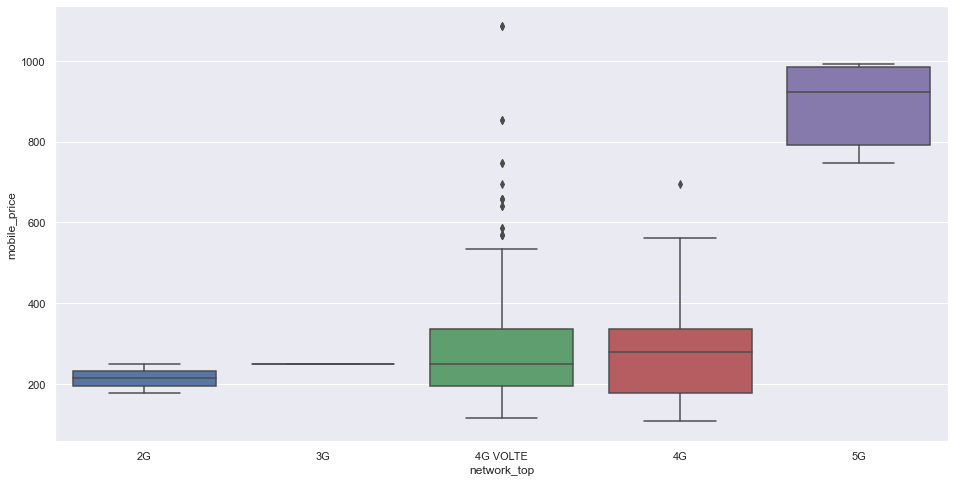

In [51]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'network_top', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('network_top')['mobile_price'].median().sort_values().index)

5G network is the most expensive, the relation here is 5G or non-5G phone VS mobile_price

There is a strong relation here

<AxesSubplot:xlabel='f_cam_1', ylabel='mobile_price'>

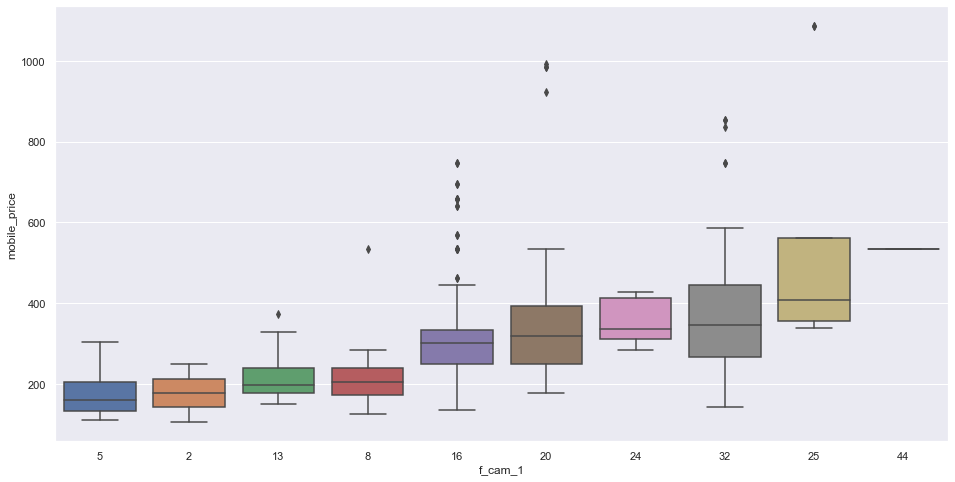

In [52]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'f_cam_1', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('f_cam_1')['mobile_price'].median().sort_values().index)

The number of f_cam_1 has high relationship with mobile_price. It is a good predictor

<AxesSubplot:xlabel='f_cam_2', ylabel='mobile_price'>

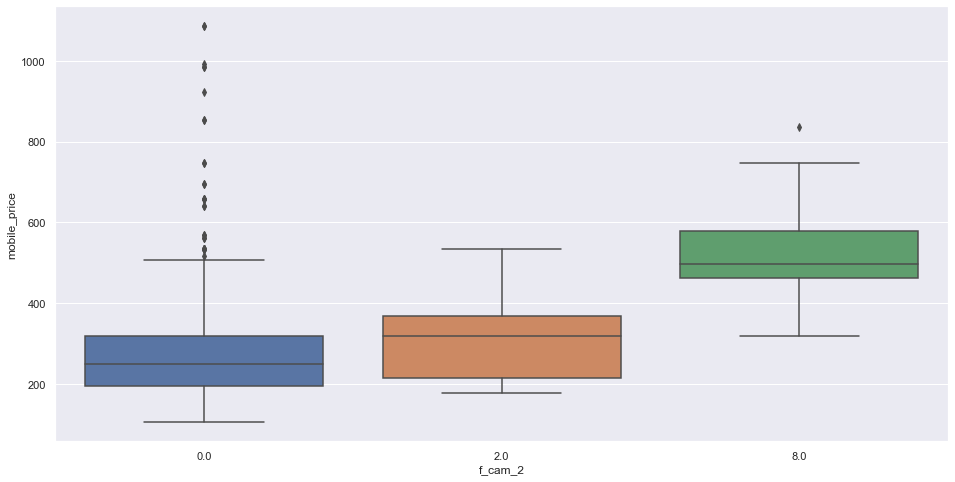

In [53]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'f_cam_2', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('f_cam_2')['mobile_price'].median().sort_values().index)

High relationship between f_cam_2 and mobile_price

<AxesSubplot:xlabel='p_cam_1', ylabel='mobile_price'>

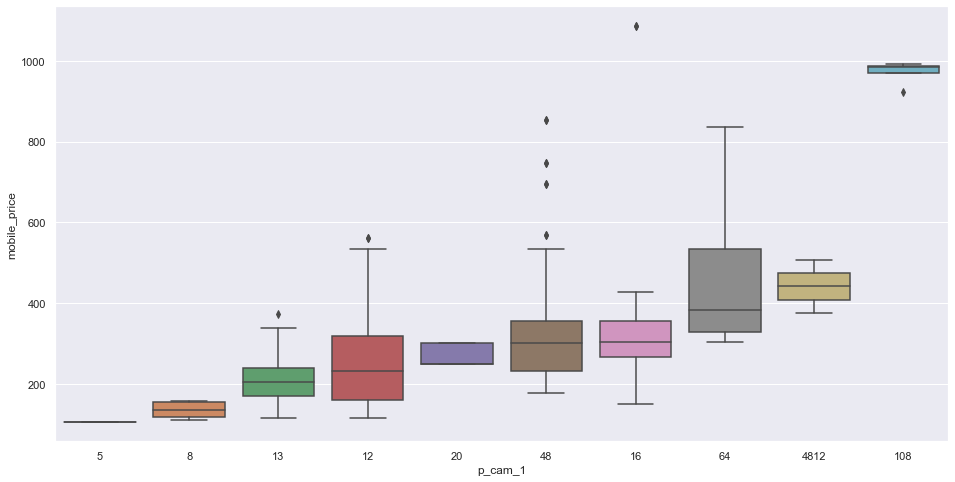

In [54]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'p_cam_1', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('p_cam_1')['mobile_price'].median().sort_values().index)

High relationship between p_cam_2 and mobile_price. It can be a good predictor

<AxesSubplot:xlabel='p_cam_3', ylabel='mobile_price'>

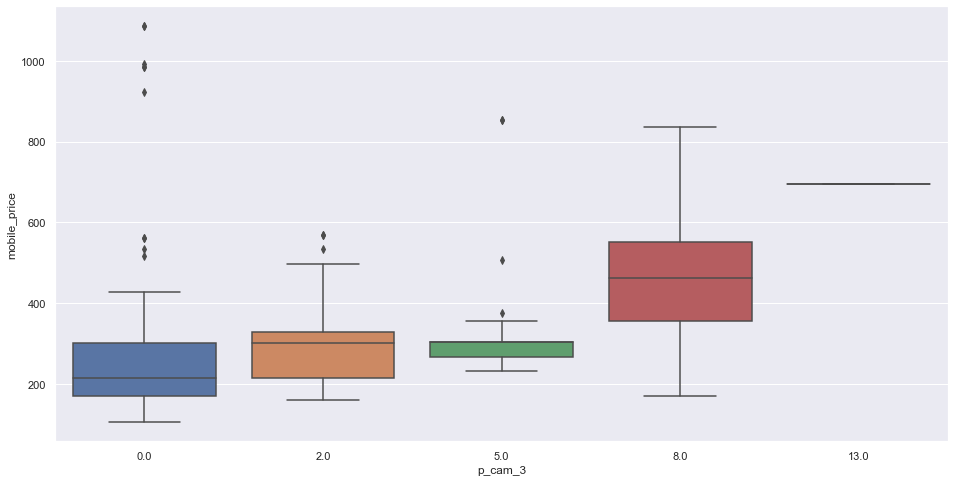

In [55]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'p_cam_3', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('p_cam_3')['mobile_price'].median().sort_values().index)

High relationship between p_cam_3 and mobile_price. It can be a good predictor

<AxesSubplot:xlabel='p_cam_4', ylabel='mobile_price'>

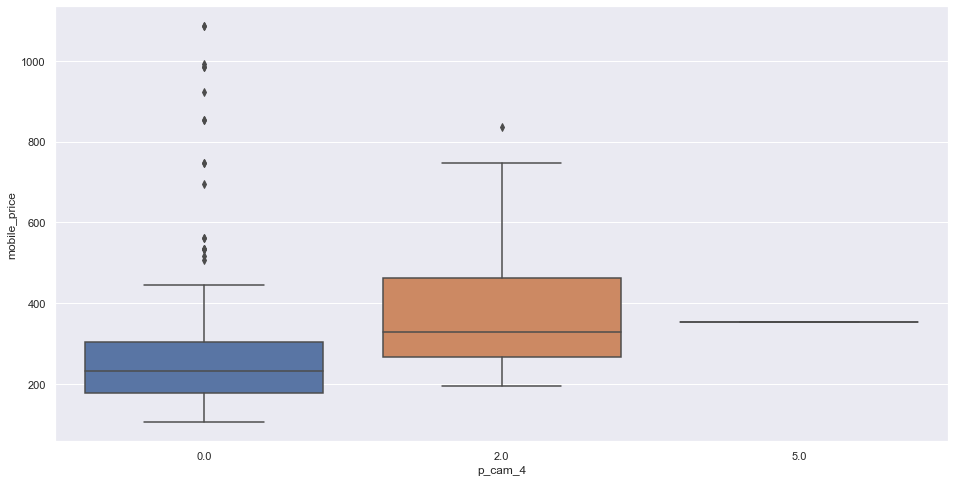

In [56]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'p_cam_4', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('p_cam_4')['mobile_price'].median().sort_values().index)

Weak relationship between p_cam_4 and mobile_price but still can be used as a predictor